!module load py-efel

!module load py-bluepy

In [1]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle as pkl

import h5py

from json2html import *


In [2]:
len(efel.getFeatureNames())

163

In [2]:
#features from Michiel

main_feat = ['AP_amplitude','AP_height','AP_duration_half_width','mean_frequency',
 'AHP_depth','AHP_time_from_peak','voltage_base',
 'time_to_first_spike','time_to_last_spike','ISI_CV','ISI_log_slope',
 'inv_first_ISI',
 'inv_second_ISI',
 'inv_third_ISI', 
 'inv_fourth_ISI',
 'inv_fifth_ISI',
 'inv_last_ISI'
]

In [2]:
import h5py

f = h5py.File('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_gen_newThalStim_1to4_1dec2020/soma.h5', 'r')

mat = f['data']

print("Keys: %s" % f.keys())

Keys: <KeysViewHDF5 ['data', 'mapping']>


In [2]:
import h5py

f = h5py.File('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_gen_inasum_2dec2020/NaCurrentAllCmps.h5', 'r')

mat = f['data']

print("Keys: %s" % f.keys())

Keys: <KeysViewHDF5 ['data', 'mapping']>


In [7]:
mat.shape[0]

50000

In [3]:
subm = mat[5000:15000, :]

In [3]:
subm = mat[10000:20000, :]

In [3]:
subm = mat[20000:30000, :]

In [3]:
subm = mat[30000:40000, :]

In [3]:
subm = mat[40000:50000, :]

In [9]:
subm.shape[0]

10000

In [ ]:
#f2 = h5py.File('somaSubmat.h5', 'w')
#dset = f2.create_dataset('sub_matrix', shape=(1000, 22918), dtype=np.float32)
#dset.write_direct(mat[1000:2000, :])
#f2.close()

In [47]:
mat.shape

(50000, 22918)

In [4]:
time = np.arange(500.0, 1500.0,0.1)

In [17]:
subdf = pd.DataFrame(subm)
subdf['time'] = time

In [6]:
spike_counts = pd.DataFrame(columns = ['time','gid'])

for idx in subdf.columns[0:len(subdf.columns)-1]:
#for idx in subdf.columns[0:20]:
    
    #Index_label1 = np.asarray(subdf[subdf[idx]>0].index.tolist()) 
    Index_label1 = np.asarray(subdf.index.tolist()) 
    
    candidates = []
    
    for item in Index_label1:
        if subdf.loc[item,idx] >0:
            candidates.append(item)
    
    if len(candidates) > 0: 
        Index_label = np.asarray(candidates) 

        sidx = Index_label.argsort()
        ys = Index_label[sidx]


        cut_idx = np.flatnonzero(np.concatenate(([True], np.diff(ys)!=1 )))

        y_new = Index_label[np.minimum.reduceat(sidx, cut_idx)]

        #print(y_new)
        
        for y_new_t in y_new:
            timepoint = subdf.loc[y_new_t,'time']
            spike_counts.loc[len(spike_counts.index)] = [timepoint, idx]  


KeyboardInterrupt: 

In [6]:
#spike_counts = pd.DataFrame(columns = ['time','gid'])

spike_num =0 

for idx in subdf.columns[0:len(subdf.columns)-1]:
#for idx in subdf.columns[0:20]:
    
    #Index_label1 = np.asarray(subdf[subdf[idx]>0].index.tolist()) 
    Index_label1 = np.asarray(subdf.index.tolist()) 
    
    candidates = []
    
    for item in Index_label1:
        if subdf.loc[item,idx] >0:
            candidates.append(item)
    
    if len(candidates) > 0: 
        Index_label = np.asarray(candidates) 

        sidx = Index_label.argsort()
        ys = Index_label[sidx]


        cut_idx = np.flatnonzero(np.concatenate(([True], np.diff(ys)!=1 )))

        y_new = Index_label[np.minimum.reduceat(sidx, cut_idx)]

        #print(y_new)
        
        for y_new_t in y_new:
            spike_num +=1
            #timepoint = subdf.loc[y_new_t,'time']
            #spike_counts.loc[len(spike_counts.index)] = [timepoint, idx]  


/gpfs/bbp.cscs.ch/ssd/apps/tools/jupyter/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


In [7]:
spike_num # 40000:50000

287698

In [7]:
spike_num# 30000:40000

282919

In [8]:
spike_num # 20000:30000

278078

In [8]:
spike_num # 10000:20000

268679

In [10]:
len(spike_counts) # 0:10000

297965

In [9]:
len(spike_counts)*5

1489825

In [8]:
297965+268679+278078+282919+287698

1415339

In [7]:
spike_counts.head()

time  gid
0  1014.8  0.0
1  1037.7  1.0
2  1045.4  2.0
3  1371.8  2.0
4  1004.8  5.0

In [168]:
spike_counts.shape

(177517, 2)

In [3]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER])
mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}

In [9]:
c.cells.get(2)

x                                                          484.475
y                                                          1933.69
z                                                          591.369
orientation      [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...
etype                                                         cNAC
layer                                                            1
me_combo         cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...
morph_class                                                    INT
morphology           sm080529a1-5_idA_-_Scale_x1.000_y0.950_z1.000
mtype                                                       L1_DAC
region                                                          L1
synapse_class                                                  INH
Name: 2, dtype: object

In [8]:
c.cells.get(8931)

x                                                          427.137
y                                                          1725.87
z                                                          411.358
orientation      [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...
etype                                                       cADpyr
layer                                                            3
me_combo         cADpyr_L3TPC_L3_TPC:A_3_dend-rr110125B_idA_axo...
morph_class                                                    PYR
morphology       dend-rr110125B_idA_axon-rp120531_P_2_idA_-_Sca...
mtype                                                     L3_TPC:A
region                                                          L3
synapse_class                                                  EXC
Name: 8931, dtype: object

In [ ]:
#/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/param_p150_met_gen_inasum_nostim_

In [6]:
c.cells.get(162593)

x                                                          627.617
y                                                          834.161
z                                                          511.523
orientation      [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...
etype                                                       cACint
layer                                                            5
me_combo         cACint_L23MC_L5_MC_5_rp110711_C1-2_idB_-_Scale...
morph_class                                                    INT
morphology          rp110711_C1-2_idB_-_Scale_x1.000_y0.975_z1.000
mtype                                                        L5_MC
region                                                          L5
synapse_class                                                  INH
Name: 162593, dtype: object

In [5]:
c.cells.get(18331)

x                                                          457.556
y                                                           1421.1
z                                                          714.935
orientation      [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...
etype                                                       cACint
layer                                                            3
me_combo         cACint_L23MC_L23_LBC_3_mtC231100A_idA_-_Scale_...
morph_class                                                    INT
morphology       mtC231100A_idA_-_Scale_x1.000_y0.950_z1.000_-_...
mtype                                                      L23_LBC
region                                                          L3
synapse_class                                                  INH
Name: 18331, dtype: object

In [21]:
22918/1280

17.9046875

In [4]:
dfgaba = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_withMet_2021010812.tsv',sep='\t',header=None)

dfglut = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_withMet_2021010812.tsv',sep='\t',header=None)

In [8]:
dfgaba = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_withMet_2021010809.tsv',sep='\t',header=None)

dfglut = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_withMet_2021010809.tsv',sep='\t',header=None)

In [77]:
#domain err /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/gen_nostim

#dfgaba = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/outs_r_gaba_gen_nostim_06jan2021.tsv',sep='\t',header=None)

#dfglut = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/outs_r_glut_gen_nostim_06jan2021.tsv',sep='\t',header=None)

In [9]:
#dfgaba.columns = ["idxm","rank","sgid","v"]
dfgaba.columns = ["idxm","sgid","v"]
dfgaba.head()


idxm     sgid      v
0     0   1800.0  276.0
1     0   2923.0  276.0
2     0   3172.0    0.0
3     0   7791.0    0.0
4     0  15573.0  276.0

In [10]:
#dfglut.columns = ["idxm","rank","sgid","v"]
dfglut.columns = ["idxm","sgid","v"]
dfglut.head()


idxm     sgid    v
0     0   1800.0  1.0
1     0   2923.0  1.0
2     0   3172.0  0.0
3     0   7791.0  0.0
4     0  15573.0  1.0

In [11]:
len(dfglut['sgid'].unique())

10309

In [12]:
len(dfgaba['sgid'].unique())

10309

In [13]:
len(dfglut.loc[~dfglut['sgid'].isin(dfgaba['sgid'].unique()),'sgid'].unique())

0

In [81]:
mc2_cells = mc2_cells.reset_index()

In [82]:
dfglut = pd.merge(dfglut,mc2_cells,left_on='sgid',right_on='index',how='inner')
dfgaba = pd.merge(dfgaba,mc2_cells,left_on='sgid',right_on='index',how='inner')

In [87]:
dfglut.idxm.unique()

array([0, 1, 2])

In [86]:
dfgaba.idxm.unique()

array([0, 1, 2])

In [85]:
dfgaba.loc[dfgaba['v'] == dfgaba['v'].max(),:]

idxm  sgid          v  level_0  index           x            y  \
6939     0   2.0  2173351.0        0      2  484.474727  1933.685846   

               z synapse_class  layer  
6939  591.369003           INH      1

In [88]:
dfglut.loc[dfglut['v'] == dfglut['v'].max(),:]

idxm  sgid          v  level_0  index           x            y  \
6939     0   2.0  5724982.0        0      2  484.474727  1933.685846   

               z synapse_class  layer  
6939  591.369003           INH      1

In [96]:
np.max(dfgaba['v'])

2173351.0

In [97]:
np.median(dfgaba['v'])

1557.0

In [116]:
np.max(dfgaba['v'])/np.median(dfgaba['v'])

1395.8580603725113

In [115]:
np.median(dfgaba['v'])/np.max(dfgaba['v'])

0.0007164052194054251

In [98]:
np.mean(dfgaba['v'])

5126.557087462301

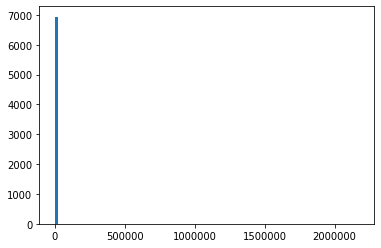

In [94]:
plt.hist(dfgaba['v'],bins=100)
plt.show()

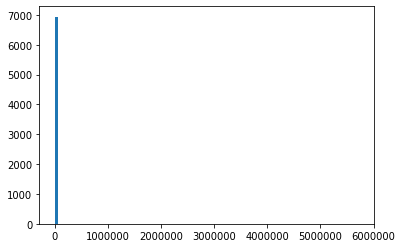

In [91]:
plt.hist(dfglut['v'],bins=100)
plt.show()

In [ ]:
weird_gids = [
2.0,
8931.0,
18331.0,
27646.0,
37034.0,
45810.0,
54901.0,
64158.0,
73212.0,
82546.0,
127690.0,
137019.0,
145930.0,
155190.0
]

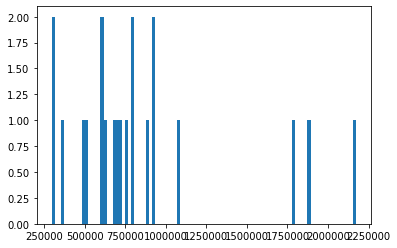

In [114]:
plt.hist(dfgaba.loc[dfgaba['sgid'].isin(weird_gids),'v'],bins=100)
plt.show()

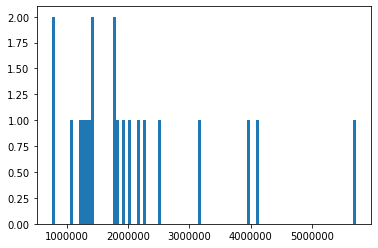

In [111]:
plt.hist(dfglut.loc[dfglut['sgid'].isin(weird_gids),'v'],bins=100)
plt.show()

In [122]:
print(weird_gids)

[2.0, 8931.0, 18331.0, 27646.0, 37034.0, 45810.0, 54901.0, 64158.0, 73212.0, 82546.0, 127690.0, 137019.0, 145930.0, 155190.0]


In [110]:
len(weird_gids)

14

In [112]:
weird_gids_df = c.cells.get(weird_gids)

In [113]:
weird_gids_df

x            y           z  \
2       484.474727  1933.685846  591.369003   
8931    427.136977  1725.870860  411.357557   
18331   457.555776  1421.103066  714.935066   
27646   298.052349  2006.064276  522.935025   
37034   345.531877   308.794202  648.660080   
45810   479.532147   191.156578  476.777892   
54901   215.340852   391.082743  697.472661   
64158   520.837807   436.648278  635.655808   
73212   518.627361   496.145656  591.327735   
82546   361.115220   123.554863  587.071689   
127690  329.605270   958.546448  681.557263   
137019  292.664830   747.902065  523.113614   
145930  491.075487  1219.722141  430.761281   
155190  509.000566   870.617385  693.800941   

                                              orientation   etype  layer  \
2       [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...    cNAC      1   
8931    [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      3   
18331   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cACint      3   
27646   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...    cNAC      1   
37034   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      6   
45810   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cACint      6   
54901   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...     bAC      6   
64158   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      6   
73212   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      6   
82546   [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      6   
127690  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      5   
137019  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      5   
145930  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      5   
155190  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cADpyr      5   

                                                 me_combo morph_class  \
2       cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_...         INT   
8931    cADpyr_L3TPC_L3_TPC:A_3_dend-rr110125B_idA_axo...         PYR   
18331   cACint_L23MC_L23_LBC_3_mtC231100A_idA_-_Scale_...         INT   
27646   cNAC_L23BTC_L1_HAC_1_sm080908a1-7_idC_-_Scale_...         INT   
37034   cADpyr_L6HPC_L6_BPC_6_dend-vd110330_idA_axon-t...         PYR   
45810   cACint_L23MC_L6_MC_6_tkb061026b1-3_idC_-_Scale...         INT   
54901   bAC_L23BTC_L6_LBC_6_tkb061101a2_ch2_bc_h_zk_60...         INT   
64158   cADpyr_L6BPC_L6_IPC_6_dend-rp160303_A_idB_axon...         PYR   
73212   cADpyr_L6BPC_L6_TPC:A_6_dend-tkb060223b3_ch1_c...         PYR   
82546   cADpyr_L6HPC_L6_TPC:C_6_dend-rp160303_A_idF_ax...         PYR   
127690  cADpyr_L5TPC_L5_TPC:C_5_dend-Fluo2_left_axon-v...         PYR   
137019  cADpyr_L5TPC_L5_TPC:B_5_dend-C261296A-P3_axon-...         PYR   
145930  cADpyr_L5TPC_L5_TPC:B_5_dend-C040896A-P3_axon-...         PYR   
155190  cADpyr_L5TPC_L5_TPC:A_5_dend-vd111207_idB_axon...         PYR   

                                               morphology     mtype region  \
2           sm080529a1-5_idA_-_Scale_x1.000_y0.950_z1.000    L1_DAC     L1   
8931    dend-rr110125B_idA_axon-rp120531_P_2_idA_-_Sca...  L3_TPC:A     L3   
18331   mtC231100A_idA_-_Scale_x1.000_y0.950_z1.000_-_...   L23_LBC     L3   
27646       sm080908a1-7_idC_-_Scale_x1.000_y0.950_z1.000    L1_HAC     L1   
37034   dend-vd110330_idA_axon-tkb051205a4_ch3_cl_b_yw...    L6_BPC     L6   
45810      tkb061026b1-3_idC_-_Scale_x1.000_y0.950_z1.000     L6_MC     L6   
54901   tkb061101a2_ch2_bc_h_zk_60x_1_-_Scale_x1.000_y...    L6_LBC     L6   
64158   dend-rp160303_A_idB_axon-mtC200301A_idB_-_Scal...    L6_IPC     L6   
73212   dend-tkb060223b3_ch1_cc2_o_ps_60x_1_axon-Fluo4...  L6_TPC:A     L6   
82546   dend-rp160303_A_idF_axon-tkb060123a1_ch1_ct_b_...  L6_TPC:C     L6   
127690  dend-Fluo2_left_axon-vd111219_idE_-_Scale_x1.0...  L5_TPC:C     L5   
137019  dend-C261296A-P3_axon-C060116A4_-_Scale_x1.000...  L5_TPC:B     L5   
145930  dend-C040896A-P3_axon-rp120525_P_1_idC_-_Scale...  L

In [109]:
mc2_cells.loc[mc2_cells['index'].isin(weird_gids),:]

index           x            y           z synapse_class  layer
0           2  484.474727  1933.685846  591.369003           INH      1
1280     8931  427.136977  1725.870860  411.357557           EXC      3
2560    18331  457.555776  1421.103066  714.935066           INH      3
3840    27646  298.052349  2006.064276  522.935025           INH      1
5120    37034  345.531877   308.794202  648.660080           EXC      6
6400    45810  479.532147   191.156578  476.777892           INH      6
7680    54901  215.340852   391.082743  697.472661           INH      6
8960    64158  520.837807   436.648278  635.655808           EXC      6
10240   73212  518.627361   496.145656  591.327735           EXC      6
11520   82546  361.115220   123.554863  587.071689           EXC      6
17920  127690  329.605270   958.546448  681.557263           EXC      5
19200  137019  292.664830   747.902065  523.113614           EXC      5
20480  145930  491.075487  1219.722141  430.761281           EXC      5
21760  155190  509.000566   870.617385  693.800941           EXC      5

In [32]:
param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_thal.txt",sep=", ",header=None)

/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [33]:
param.columns = ['c_gid','rank','outs_glut_or_gaba']

In [34]:
param.head()

c_gid  rank  outs_glut_or_gaba
0      6     2                0.0
1    124    14                0.0
2   3021   422                0.0
3    553    70                0.0
4   5771   816                0.0

In [25]:
len(param.loc[param['outs_glut_or_gaba']!=0,'c_gid'].unique())

182

In [ ]:
dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0),: ]

In [11]:
dfgaba.loc[(dfgaba['idxm']==0)& (dfgaba['rank']==0),: ]

idxm  rank      sgid      v   index           x            y  \
1233        0     0   56568.0    3.0   56568  375.327411   134.689018   
3448        0     0   56807.0   81.0   56807  236.125625    88.503659   
4217        0     0   87269.0   88.0   87269  397.736557    60.796546   
8846        0     0  135099.0   10.0  135099  266.037524   987.772204   
18916       0     0   38527.0   46.0   38527  515.653793   354.302444   
...       ...   ...       ...    ...     ...         ...          ...   
2976403     0     0  135194.0   62.0  135194  466.383926   908.428853   
2981361     0     0   79837.0    5.0   79837  285.832546   399.629638   
2983688     0     0  162472.0  134.0  162472  471.545684   808.668761   
2986778     0     0   19896.0  272.0   19896  331.721003  1627.451460   
2987552     0     0   56397.0   56.0   56397  533.791984   384.320815   

                  z synapse_class  layer  
1233     714.631040           INH      6  
3448     627.520287           INH      6  
4217     682.263824           INH      6  
8846     677.600416           INH      5  
18916    544.048131           INH      6  
...             ...           ...    ...  
2976403  630.219147           INH      5  
2981361  641.154498           INH      6  
2983688  707.167161           INH      5  
2986778  425.046736           INH      3  
2987552  608.937671           INH      6  

[494 rows x 10 columns]

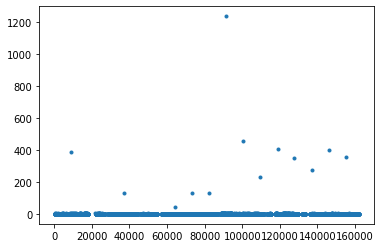

In [12]:
plt.plot(dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0),'sgid'],dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0),'v'],'.')
plt.show()

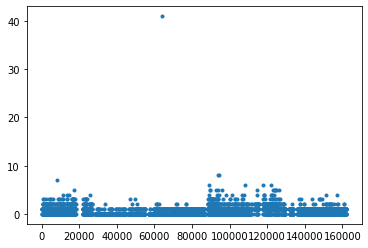

In [13]:
plt.plot(dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0)&(dfglut['v']<100),'sgid'],dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0)&(dfglut['v']<100),'v'],'.')
plt.show()

In [15]:
dfglut['layer'].unique()

array([3, 6, 4, 2, 5])

In [16]:
len(dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0),'sgid'].unique())

4774

In [17]:
len(dfglut.loc[(dfglut['idxm']==0),'sgid'].unique())

20059

In [18]:
len(dfgaba.loc[(dfgaba['idxm']==0),'sgid'].unique())

2859

In [1]:
20059+2859

22918

In [19]:
len(dfglut['sgid'].unique())

10309

In [20]:
len(dfgaba['sgid'].unique())

10309

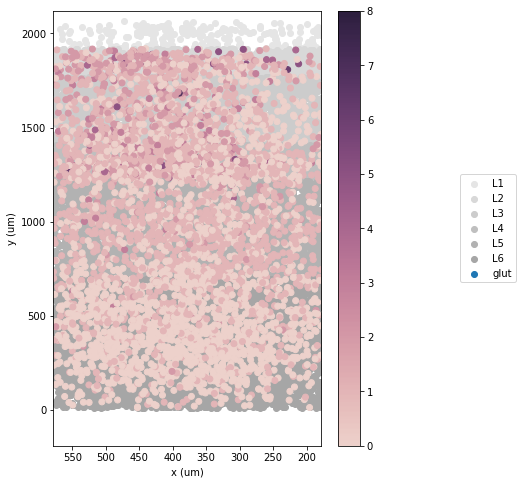

In [19]:
vmin=np.min(dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = dfglut[Cell.X].max()
x_max = dfglut[Cell.X].min()

y_min = dfglut[Cell.Y].min() 
y_max = dfglut[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.X], dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.Y], c=dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0)&(dfglut['v']<10),'v'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


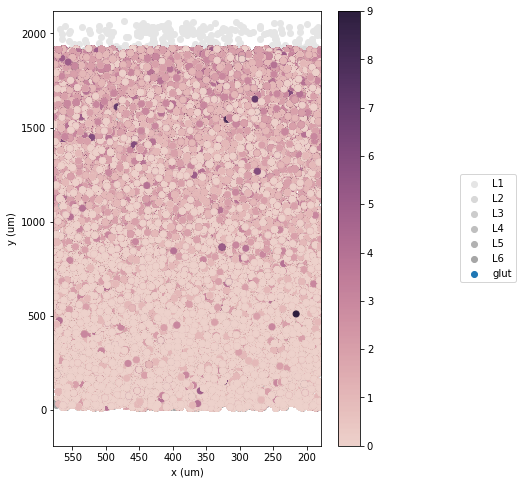

In [52]:
vmin=np.min(dfglut.loc[(dfglut['idxm']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(dfglut.loc[(dfglut['idxm']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = dfglut[Cell.X].max()
x_max = dfglut[Cell.X].min()

y_min = dfglut[Cell.Y].min() 
y_max = dfglut[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(dfglut.loc[(dfglut['idxm']==0)&(dfglut['v']<10),Cell.X], dfglut.loc[(dfglut['idxm']==0)&(dfglut['v']<10),Cell.Y], c=dfglut.loc[(dfglut['idxm']==0)&(dfglut['v']<10),'v'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


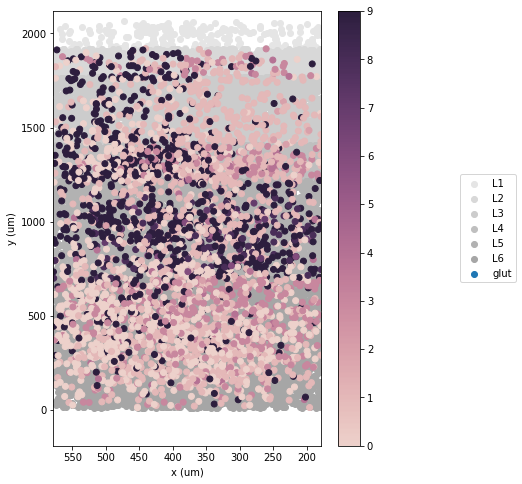

In [20]:
vmin=np.min(dfglut.loc[(dfglut['idxm']==2)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(dfglut.loc[(dfglut['idxm']==2)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = dfglut[Cell.X].max()
x_max = dfglut[Cell.X].min()

y_min = dfglut[Cell.Y].min() 
y_max = dfglut[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(dfglut.loc[(dfglut['idxm']==2)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.X], 
                 dfglut.loc[(dfglut['idxm']==2)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.Y], 
                 c=dfglut.loc[(dfglut['idxm']==2)& (dfglut['rank']==0)&(dfglut['v']<10),'v'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


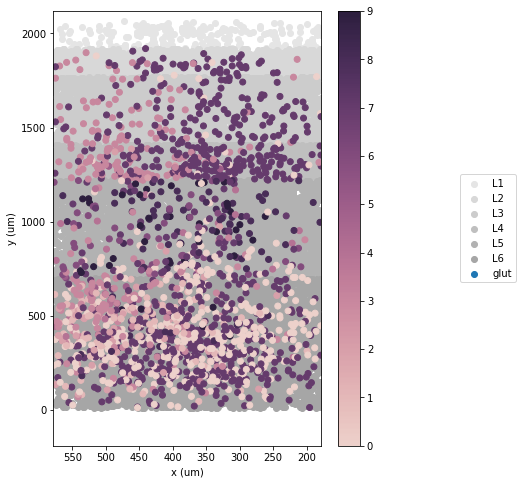

In [21]:
vmin=np.min(dfglut.loc[(dfglut['idxm']==3)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(dfglut.loc[(dfglut['idxm']==3)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = dfglut[Cell.X].max()
x_max = dfglut[Cell.X].min()

y_min = dfglut[Cell.Y].min() 
y_max = dfglut[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(dfglut.loc[(dfglut['idxm']==3)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.X], 
                 dfglut.loc[(dfglut['idxm']==3)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.Y], 
                 c=dfglut.loc[(dfglut['idxm']==3)& (dfglut['rank']==0)&(dfglut['v']<10),'v'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


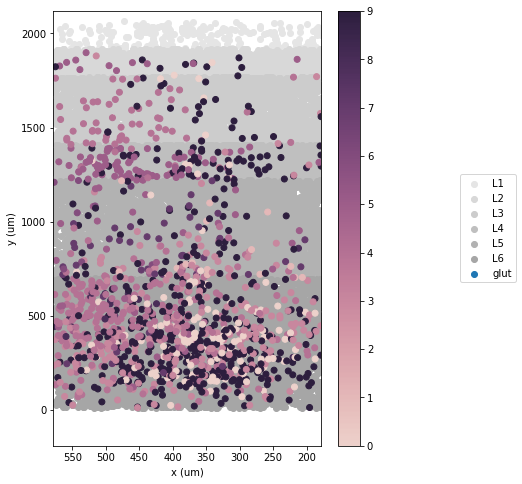

In [22]:
vmin=np.min(dfglut.loc[(dfglut['idxm']==4)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(dfglut.loc[(dfglut['idxm']==4)& (dfglut['rank']==0)&(dfglut['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = dfglut[Cell.X].max()
x_max = dfglut[Cell.X].min()

y_min = dfglut[Cell.Y].min() 
y_max = dfglut[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(dfglut.loc[(dfglut['idxm']==4)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.X], 
                 dfglut.loc[(dfglut['idxm']==4)& (dfglut['rank']==0)&(dfglut['v']<10),Cell.Y], 
                 c=dfglut.loc[(dfglut['idxm']==4)& (dfglut['rank']==0)&(dfglut['v']<10),'v'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


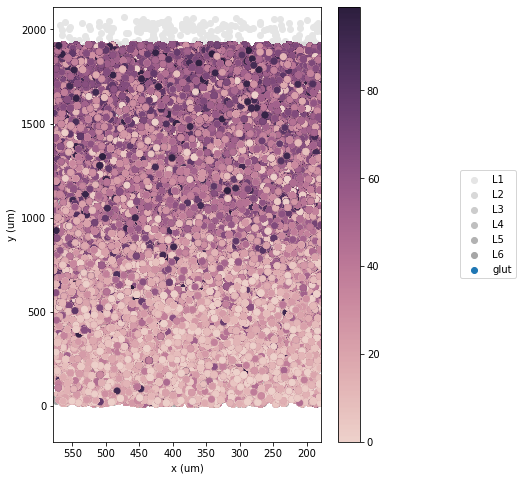

In [53]:
vmin=np.min(dfglut.loc[(dfglut['idxm']==4)&(dfglut['v']<100),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(dfglut.loc[(dfglut['idxm']==4)&(dfglut['v']<100),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = dfglut[Cell.X].max()
x_max = dfglut[Cell.X].min()

y_min = dfglut[Cell.Y].min() 
y_max = dfglut[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(dfglut.loc[(dfglut['idxm']==4)& (dfglut['v']<100),Cell.X], 
                 dfglut.loc[(dfglut['idxm']==4)& (dfglut['v']<100),Cell.Y], 
                 c=dfglut.loc[(dfglut['idxm']==4)& (dfglut['v']<100),'v'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


In [59]:
dfgaba.head()

idxm  rank     sgid      v  index           x           y          z  \
0     0   298  45092.0    0.0  45092  304.065224  189.018386  692.08666   
1     0  1141  45092.0  276.0  45092  304.065224  189.018386  692.08666   
2     0   322  45092.0   47.0  45092  304.065224  189.018386  692.08666   
3     0   867  45092.0   85.0  45092  304.065224  189.018386  692.08666   
4     0   927  45092.0   78.0  45092  304.065224  189.018386  692.08666   

  synapse_class  layer  
0           INH      6  
1           INH      6  
2           INH      6  
3           INH      6  
4           INH      6

In [55]:
dfglut.columns

Index(['idxm', 'rank', 'sgid', 'v', 'index', 'x', 'y', 'z', 'synapse_class',
       'layer'],
      dtype='object')

In [23]:
dfglut.loc[dfglut['layer']==6,:].head()

idxm  rank     sgid    v  index           x           y           z  \
41310     0  1055  29177.0  0.0  29177  404.654487  692.335983  436.889775   
41311     0   682  29177.0  0.0  29177  404.654487  692.335983  436.889775   
41312     0   269  29177.0  0.0  29177  404.654487  692.335983  436.889775   
41313     0  1083  29177.0  0.0  29177  404.654487  692.335983  436.889775   
41314     0   322  29177.0  1.0  29177  404.654487  692.335983  436.889775   

      synapse_class  layer  
41310           EXC      6  
41311           EXC      6  
41312           EXC      6  
41313           EXC      6  
41314           EXC      6

In [24]:
dfglut.loc[dfglut['layer']==2,:].head()

idxm  rank      sgid    v   index           x            y  \
203185     0  1055  114523.0  8.0  114523  409.427817  1881.013842   
203186     0  1120  114523.0  2.0  114523  409.427817  1881.013842   
203187     0   251  114523.0  1.0  114523  409.427817  1881.013842   
203188     0   482  114523.0  3.0  114523  409.427817  1881.013842   
203189     0   878  114523.0  2.0  114523  409.427817  1881.013842   

                 z synapse_class  layer  
203185  390.657643           EXC      2  
203186  390.657643           EXC      2  
203187  390.657643           EXC      2  
203188  390.657643           EXC      2  
203189  390.657643           EXC      2

In [25]:
len(dfgaba.loc[(dfgaba['idxm']==0)& (dfgaba['rank']==0),'sgid'].unique())

494

In [26]:
len(dfgaba.loc[(dfgaba['idxm']==0)& (dfgaba['rank']==1),'sgid'].unique())

490

In [27]:
len(dfgaba.loc[(dfgaba['idxm']==0)& (dfgaba['rank']==430),'sgid'].unique())

407

In [1]:
# pickle
import pickle as pkl

In [3]:
with open("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/all_needs_rank0_11jan2021.pkl",'rb') as hdl:
    needs1 = pkl.load(hdl)

In [4]:
len(needs1)

1280

In [5]:
len(needs1[1])

18

In [36]:
#with open("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/outs_r_gaba_gen_nostim_0_11jan2021.pkl",'rb') as handl:
with open("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/outs_r_gaba_gen_thal_rank0.pkl",'rb') as handl:
    gabapkl0 = pkl.load(handl)

#with open("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/outs_r_glut_gen_nostim_0_11jan2021.pkl",'rb') as handl:
with open("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/outs_r_glut_gen_nostim_1_12jan2021.pkl",'rb') as handl:
    glutpkl0 = pkl.load(handl)

In [37]:
len([k for k,v in glutpkl0.items() if v != 0.0])

207

In [29]:
len([k for k,v in gabapkl0.items() if v != 0.0])

15

In [6]:
len(set(gabapkl0.keys()))

139276

In [11]:
139276 - 22918

116358

In [16]:
with open("/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/gids_sets/mc2_gids.txt",'r') as mc2f:
    mc2ids = mc2f.readlines()

In [23]:
mc2ids = [int(v) for v in mc2ids]

In [24]:
len(mc2ids)

22918

In [28]:
gabamc2 = [k for k,v in gabapkl0.items() if ((k in mc2ids) and (v!=0.0))]

In [29]:
len(gabamc2)

22909

In [14]:
22918*6

137508

In [30]:
max(glutpkl0.values())

2.0

In [31]:
max(gabapkl0.values())

1.0

In [26]:
max(gabapkl0.values())/np.median([v for v in gabapkl0.values()])

63.50819672131148

In [24]:
4000.0 * 3874.0 * 1e3 / ( 6.02e23 * 3000 * 1e-15 )

0.008580287929125137

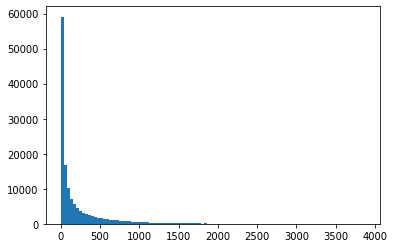

In [20]:
plt.hist(gabapkl0.values(),bins=100)
plt.show()

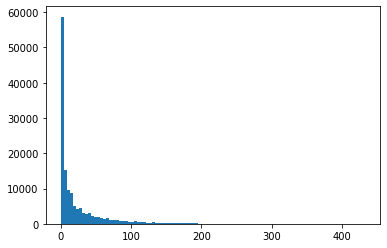

In [19]:
plt.hist(glutpkl0.values(),bins=100)
plt.show()

In [12]:
len(glutpkl0.keys())

139276

In [10]:
len(gabapkl0.keys())

139276

In [7]:
len(set(list(glutpkl0.keys())))

139276

In [27]:
glutpkl0df = pd.DataFrame(glutpkl0.items())

In [28]:
gabapkl0df = pd.DataFrame(gabapkl0.items())

In [29]:
gabapkl0df.columns = ['sgid','v']

In [30]:
glutpkl0df.columns = ['sgid','v']

In [31]:
gabapkl0df.loc[gabapkl0df['v']==gabapkl0df['v'].max(),:]

sgid       v
22446  132133  3874.0

In [32]:
np.max(gabapkl0df['v'])/np.median(gabapkl0df['v'])

63.50819672131148

In [33]:
glutpkl0df.loc[glutpkl0df['v']==glutpkl0df['v'].max(),:]

sgid      v
15356  90609  433.0

In [121]:
np.max(glutpkl0df['v'])/np.median(glutpkl0df['v'])

1427.0

In [38]:
mc2_cells = mc2_cells.reset_index()

In [39]:
glutpkl0dfmc2 = pd.merge(glutpkl0df,mc2_cells,left_on='sgid',right_on='index',how='inner')

In [41]:
gluts = pd.merge(glutpkl0df,glutpkl0df,on='sgid',how='inner')

In [42]:
len(gluts)

139276

In [48]:
len(gluts['sgid'].unique())

4774

In [49]:
len(glutpkl0df['sgid'].unique())

10309

In [50]:
len(dfglut.loc[(dfglut['idxm']==0)& (dfglut['rank']==0),'sgid'].unique())

4774

In [51]:
len(dfglut.loc[(dfglut['idxm']==0),'sgid'].unique())

20059

In [47]:
gluts.loc[gluts['v_x']!=gluts['v_y']].head()

Empty DataFrame
Columns: [idxm, rank, sgid, v_x, index, x, y, z, synapse_class, layer, v_y]
Index: []

In [43]:
mixed = pd.merge(glutpkl0dfmc2,gabapkl0df,on='sgid',how='inner' )

In [49]:
len(gabapkl0df['sgid'].unique())

139276

In [44]:
mixed.head()

sgid    v_x  index           x            y           z synapse_class  \
0  1157  189.0   1157  424.529892  1736.347357  468.279656           EXC   
1  1361   77.0   1361  509.686691  1410.538926  542.970470           EXC   
2  1528   40.0   1528  381.808074  1722.348785  452.985586           EXC   
3  1898   62.0   1898  452.852893  1709.476076  464.086517           EXC   
4  2068   66.0   2068  314.987821  1533.914687  545.992069           EXC   

   layer     v_y  
0      3  1924.0  
1      3   752.0  
2      3   466.0  
3      3   584.0  
4      3   685.0

In [45]:
len(mixed['sgid'].unique())

22918

In [50]:
len(mixed.loc[(mixed['v_x']==0) & (mixed['v_y']==0),'sgid'].unique())

5

In [51]:
len(mixed.loc[(mixed['v_x']==0) & (mixed['v_y']!=0),'sgid'].unique())

32

In [52]:
len(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']==0),'sgid'].unique())

4

In [53]:
len(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0),'sgid'].unique())

22877

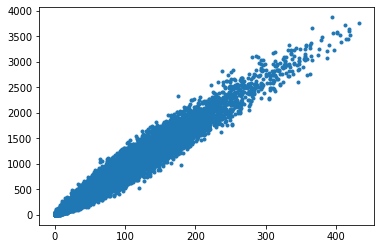

In [55]:
plt.plot(mixed['v_x'],mixed['v_y'],'.')
plt.show()

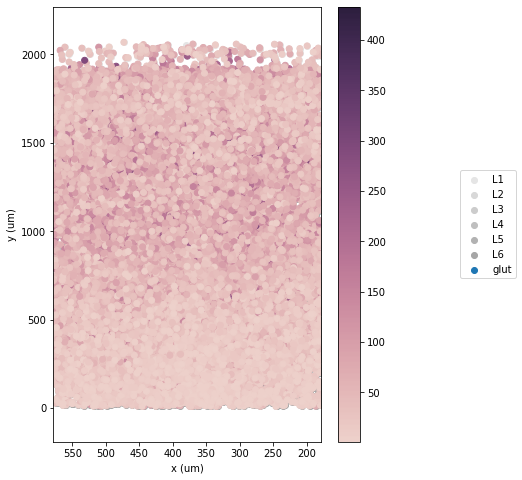

In [57]:
vmin=np.min(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0),'v_x'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0),'v_x'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = mixed[Cell.X].max()
x_max = mixed[Cell.X].min()

y_min = mixed[Cell.Y].min() 
y_max = mixed[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0),Cell.X], 
                 mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0),Cell.Y], 
                 c=mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0),'v_x'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


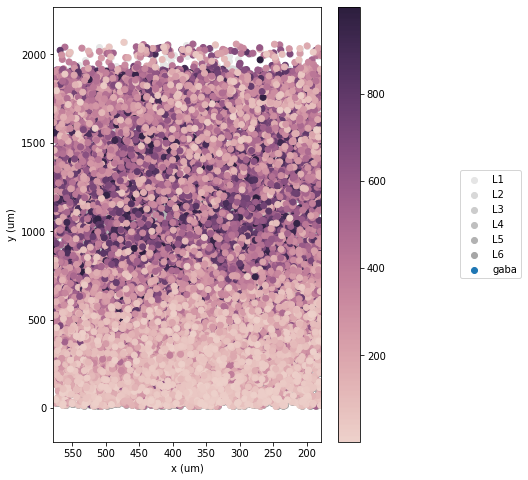

In [58]:
vmin=np.min(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0)&(mixed['v_y']<1000),'v_y'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0)&(mixed['v_y']<1000),'v_y'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = mixed[Cell.X].max()
x_max = mixed[Cell.X].min()

y_min = mixed[Cell.Y].min() 
y_max = mixed[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0)&(mixed['v_y']<1000),Cell.X], 
                 mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0)&(mixed['v_y']<1000),Cell.Y], 
                 c=mixed.loc[(mixed['v_x']!=0) & (mixed['v_y']!=0)&(mixed['v_y']<1000),'v_y'], vmin=vmin, vmax=vmax, cmap=cmap, label='gaba')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


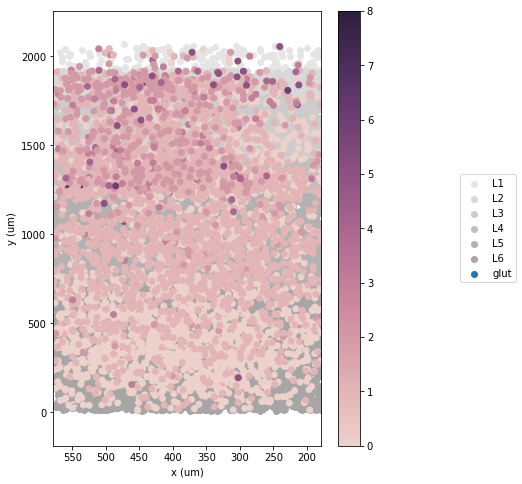

In [41]:
vmin=np.min(glutpkl0dfmc2.loc[(glutpkl0dfmc2['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(glutpkl0dfmc2.loc[(glutpkl0dfmc2['v']<10),'v'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = glutpkl0dfmc2[Cell.X].max()
x_max = glutpkl0dfmc2[Cell.X].min()

y_min = glutpkl0dfmc2[Cell.Y].min() 
y_max = glutpkl0dfmc2[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(glutpkl0dfmc2.loc[(glutpkl0dfmc2['v']<10),Cell.X], 
                 glutpkl0dfmc2.loc[(glutpkl0dfmc2['v']<10),Cell.Y], 
                 c=glutpkl0dfmc2.loc[(glutpkl0dfmc2['v']<10),'v'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


In [28]:
11474+9907

21381

In [169]:
spike_counts['gid2'] = ""

for idx,row in spike_counts.iterrows():
    spike_counts.loc[idx,'gid2'] = mc2gidsids[row['gid']]

In [170]:
spike_counts.head()

time  gid gid2
0  1579.9  0.0    2
1  1159.5  2.0    6
2  1961.7  2.0    6
3  1958.5  7.0   48
4  1121.7  9.0   83

In [172]:
spike_counts.index = spike_counts['gid2']

mc2_feat = pd.merge(mc2_cells, spike_counts, left_index=True,right_index=True, how='inner')

In [173]:
mc2_feat.shape

(177517, 8)

In [174]:
mc2_feat.head()

x            y           z synapse_class  layer    time  gid gid2
2   484.474727  1933.685846  591.369003           INH      1  1579.9  0.0    2
6   315.820475  2013.331452  540.811014           INH      1  1159.5  2.0    6
6   315.820475  2013.331452  540.811014           INH      1  1961.7  2.0    6
48  454.738593  1925.173085  634.240890           INH      1  1958.5  7.0   48
83  404.551968  1976.003922  515.887396           INH      1  1121.7  9.0   83

In [175]:
mc2_feat['synapse_class'].unique()

[INH, EXC]
Categories (2, object): [INH, EXC]

In [176]:
mc2_feat['layer'].unique()

array([1, 3, 6, 4, 2])

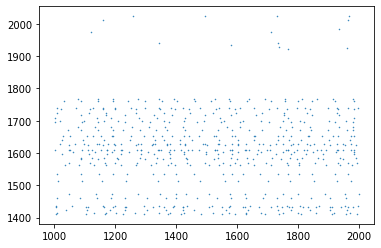

In [166]:
plt.scatter(mc2_feat['time'],mc2_feat['y'],s=0.25)

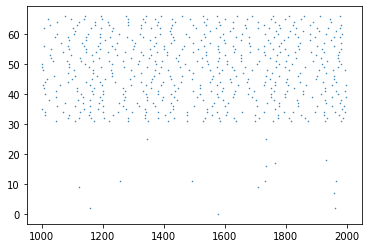

In [165]:
plt.scatter(mc2_feat['time'],mc2_feat['gid'],s=0.25)

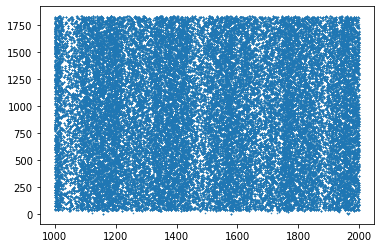

In [42]:
plt.scatter(spike_counts['time'],spike_counts['gid'],s=0.25)

In [3]:
import random

In [4]:
EXC_L1_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 1, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L2_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 2, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L3_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 3, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L4_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 4, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L5_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 5, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L6_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 6, Cell.SYNAPSE_CLASS: "EXC"})

INH_L1_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 1, Cell.SYNAPSE_CLASS: "INH"})
INH_L2_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 2, Cell.SYNAPSE_CLASS: "INH"})
INH_L3_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 3, Cell.SYNAPSE_CLASS: "INH"})
INH_L4_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 4, Cell.SYNAPSE_CLASS: "INH"})
INH_L5_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 5, Cell.SYNAPSE_CLASS: "INH"})
INH_L6_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 6, Cell.SYNAPSE_CLASS: "INH"})

#10% of cells

EXC_L2_mc2ids_10percent = random.sample(list(EXC_L2_mc2ids), round(0.1*len(EXC_L2_mc2ids)) )
EXC_L3_mc2ids_10percent = random.sample(list(EXC_L3_mc2ids), round(0.1*len(EXC_L3_mc2ids)) )
EXC_L4_mc2ids_10percent = random.sample(list(EXC_L4_mc2ids), round(0.1*len(EXC_L4_mc2ids)) )
EXC_L5_mc2ids_10percent = random.sample(list(EXC_L5_mc2ids), round(0.1*len(EXC_L5_mc2ids)) )
EXC_L6_mc2ids_10percent = random.sample(list(EXC_L6_mc2ids), round(0.1*len(EXC_L6_mc2ids)) )

INH_L1_mc2ids_10percent = random.sample(list(INH_L1_mc2ids), round(0.2*len(INH_L1_mc2ids)) ) # because no exc in L1 mc2
INH_L2_mc2ids_10percent = random.sample(list(INH_L2_mc2ids), round(0.1*len(INH_L2_mc2ids)) )
INH_L3_mc2ids_10percent = random.sample(list(INH_L3_mc2ids), round(0.1*len(INH_L3_mc2ids)) )
INH_L4_mc2ids_10percent = random.sample(list(INH_L4_mc2ids), round(0.1*len(INH_L4_mc2ids)) )
INH_L5_mc2ids_10percent = random.sample(list(INH_L5_mc2ids), round(0.1*len(INH_L5_mc2ids)) )
INH_L6_mc2ids_10percent = random.sample(list(INH_L6_mc2ids), round(0.1*len(INH_L6_mc2ids)) )

cells_10percent = []

cells_10percent.extend(EXC_L2_mc2ids_10percent)
cells_10percent.extend(EXC_L3_mc2ids_10percent)
cells_10percent.extend(EXC_L4_mc2ids_10percent)
cells_10percent.extend(EXC_L5_mc2ids_10percent)
cells_10percent.extend(EXC_L6_mc2ids_10percent)

cells_10percent.extend(INH_L1_mc2ids_10percent)
cells_10percent.extend(INH_L2_mc2ids_10percent)
cells_10percent.extend(INH_L3_mc2ids_10percent)
cells_10percent.extend(INH_L4_mc2ids_10percent)
cells_10percent.extend(INH_L5_mc2ids_10percent)
cells_10percent.extend(INH_L6_mc2ids_10percent)


In [6]:
#np.savetxt("/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/in_data/mc2_tenpercent_allLayers_EXCandINH_gids.txt",cells_10percent)

In [18]:
subdf = subdf.rename(columns = mc2gidsids)

In [14]:
subdf = subdf.loc[(subdf['time'] % 1) == 0] # to have only the data points of ATP meas

In [33]:
subdf['time'] = round(subdf['time']) 

In [36]:
mat = None

In [35]:
len(subdf)

10000

In [5]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/other/met_gen_nostim/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()


`brain` module not found. Using experimental fallback implementation for H5 report access.


In [11]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/setup_sim/sim4fig/gen_diff_pulses/linamp1long/BlueConfig')
report = sim.report('ATPConcAllCmps', source='h5')
atp2 = report.get()
atp2 = atp2.reset_index()


`brain` module not found. Using experimental fallback implementation for H5 report access.


In [6]:
atp.head()

gid  time         2         3         6        11        21        31  \
0     0.0  2.199999  2.199999  2.199999  2.199999  2.199999  2.199999   
1     1.0  2.199712  2.199712  2.199407  2.198117  2.199026  2.199604   
2     2.0  2.199425  2.199425  2.198814  2.196236  2.198052  2.199209   
3     3.0  2.199138  2.199138  2.198222  2.194355  2.197079  2.198814   
4     4.0  2.198851  2.198851  2.197630  2.192476  2.196105  2.198418   

gid        39        48        49  ...    163211    163221    163231  \
0    2.199999  2.199999  2.199999  ...  2.199997  2.200000  2.199999   
1    2.199529  2.199410  2.199215  ...  2.198334  2.199885  2.199417   
2    2.199058  2.198821  2.198431  ...  2.196670  2.199770  2.198835   
3    2.198587  2.198232  2.197646  ...  2.195008  2.199656  2.198253   
4    2.198117  2.197643  2.196862  ...  2.193346  2.199541  2.197671   

gid    163241    163250    163254    163255    163257    163260    163263  
0    2.199999  2.199997  2.199999  2.200000  2.199999  2.199998  2.199998  
1    2.198883  2.198334  2.198689  2.199873  2.199079  2.197992  2.198334  
2    2.197767  2.196670  2.197379  2.199747  2.198159  2.195987  2.196671  
3    2.196652  2.195008  2.196070  2.199620  2.197239  2.193982  2.195009  
4    2.195536  2.193346  2.194762  2.199493  2.196319  2.191979  2.193347  

[5 rows x 22919 columns]

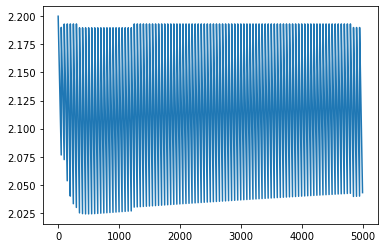

In [14]:
plt.plot(atp2['time'],atp2[45602])
plt.show()

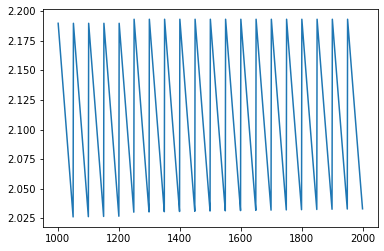

In [13]:
plt.plot(atp2.loc[(atp2['time']>1000) & (atp2['time']<2000),'time'],atp2.loc[(atp2['time']>1000) & (atp2['time']<2000),45602])
plt.show()

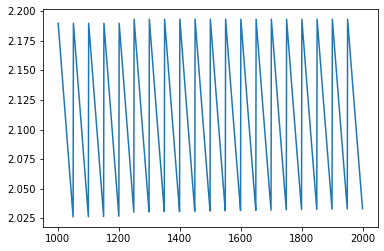

In [12]:
plt.plot(atp.loc[(atp['time']>1000) & (atp['time']<2000),'time'],atp.loc[(atp['time']>1000) & (atp['time']<2000),45602])
plt.show()

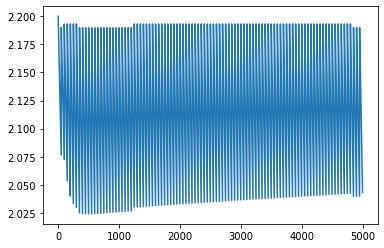

In [10]:
plt.plot(atp['time'],atp[45602])
plt.show()

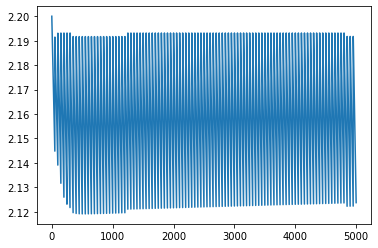

In [8]:
plt.plot(atp['time'],atp[163241])
plt.show()

In [11]:
atp_t = atp.transpose()

atp_t.columns = atp_t.loc['time',:]

atp_t.drop(atp_t.index[0], inplace=True)

In [13]:
atp_t = atp_t.reset_index()

In [28]:
i=1
atp_t['mean1'] = atp_t.iloc[:,(1000*i+1):(1000+1000*i+1)].mean()

In [29]:
type(atp_t['mean1'])

pandas.core.series.Series

In [30]:
atp_t.head()

time  gid       0.0       1.0       2.0       3.0       4.0       5.0  \
0       2  1.399999  1.399691  1.399384  1.399076  1.398768  1.398461   
1       3  1.399999  1.399255  1.398511  1.397767  1.397023  1.396279   
2       6  1.399999  1.399255  1.398511  1.397766  1.397023  1.396279   
3      11  1.399999  1.399385  1.398771  1.398157  1.397544  1.396930   
4      21  1.399999  1.399405  1.398811  1.398217  1.397624  1.397030   

time       6.0       7.0       8.0  ...    4991.0    4992.0    4993.0  \
0     1.398153  1.397846  1.397538  ...  0.845663  0.845455  0.845246   
1     1.395536  1.394792  1.394049  ...  0.095695  0.095617  0.095539   
2     1.395535  1.394792  1.394049  ...  0.087309  0.087184  0.087058   
3     1.396316  1.395700  1.395084  ...  0.010794  0.010778  0.010762   
4     1.396437  1.395843  1.395250  ...  0.165201  0.164978  0.164755   

time    4994.0    4995.0    4996.0    4997.0    4998.0    4999.0  mean1  
0     0.845036  0.844827  0.844616  0.844406  0.844195  0.843984    NaN  
1     0.095461  0.095383  0.095306  0.095229  0.095152  0.095075    NaN  
2     0.086931  0.086803  0.086675  0.086547  0.086418  0.086288    NaN  
3     0.010746  0.010730  0.010714  0.010698  0.010682  0.010666    NaN  
4     0.164533  0.164311  0.164089  0.163868  0.163647  0.163426    NaN  

[5 rows x 5002 columns]

In [12]:
subdf10 = subdf.loc[:,cells_10percent]

In [13]:
subdf10['time'] = subdf['time'].copy()

In [15]:
subdf10.columns

Index([122993, 123636, 123337, 114388, 119772, 121882, 124434, 121594, 121857,
       123496,
       ...
        45678,  55744,  55941,  44913,  55573,  87029,  87560,  55074,  45646,
       'time'],
      dtype='object', length=2313)

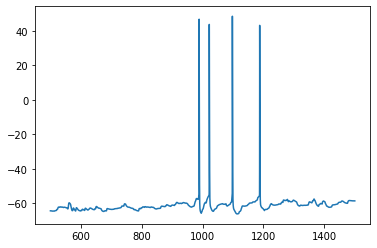

In [19]:
plt.plot(subdf10['time'],subdf10[122993])
plt.show()

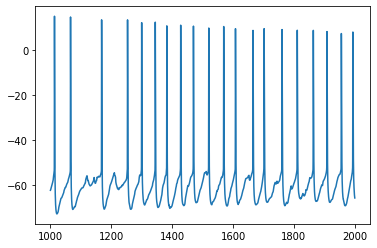

In [16]:
plt.plot(subdf2['time'],subdf2[45602])
plt.show()

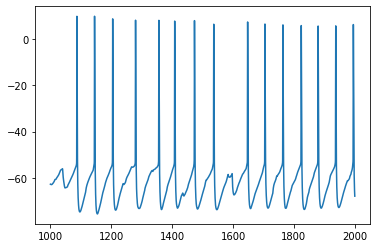

In [14]:
plt.plot(subdf2['time'],subdf2[45419])
plt.show()

In [ ]:
spike_counts = pd.DataFrame(columns = ['time','gid'])

for idx in subdf10.columns[0:len(subdf10.columns)-1]:
#for idx in subdf10.columns[0:20]:
    
    #Index_label1 = np.asarray(subdf10[subdf10[idx]>0].index.tolist()) 
    Index_label1 = np.asarray(subdf10.index.tolist()) 
    
    candidates = []
    
    for item in Index_label1:
        if subdf10.loc[item,idx] >0:
            candidates.append(item)
    
    if len(candidates) > 0: 
        Index_label = np.asarray(candidates) 

        sidx = Index_label.argsort()
        ys = Index_label[sidx]


        cut_idx = np.flatnonzero(np.concatenate(([True], np.diff(ys)!=1 )))

        y_new = Index_label[np.minimum.reduceat(sidx, cut_idx)]

        #print(y_new)
        
        for y_new_t in y_new:
            timepoint = subdf10.loc[y_new_t,'time']
            spike_counts.loc[len(spike_counts.index)] = [timepoint, idx]  


In [37]:
spike_counts = pd.DataFrame(columns = ['time','gid'])

#for idx in subdf10.columns[0:len(subdf10.columns)-1]:
for idx in subdf.columns[0:len(subdf.columns)-1]:
#for idx in subdf10.columns[0:20]:
    
    #Index_label1 = np.asarray(subdf10[subdf10[idx]>0].index.tolist()) 
    Index_label1 = np.asarray(subdf.index.tolist()) 
    
    candidates = []
    
    for item in Index_label1:
        if subdf.loc[item,idx] >0:
            candidates.append(item)
    
    if len(candidates) > 0: 
        Index_label = np.asarray(candidates) 

        sidx = Index_label.argsort()
        ys = Index_label[sidx]


        cut_idx = np.flatnonzero(np.concatenate(([True], np.diff(ys)!=1 )))

        y_new = Index_label[np.minimum.reduceat(sidx, cut_idx)]

        #print(y_new)
        
        for y_new_t in y_new:
            timepoint = subdf.loc[y_new_t,'time']
            spike_counts.loc[len(spike_counts.index)] = [timepoint, idx]  


/gpfs/bbp.cscs.ch/ssd/apps/tools/jupyter/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


In [203]:
spike_counts.head()

time       gid
0  1118.1  125438.0
1  1326.0  125438.0
2  1408.9  125438.0
3  1531.8  125438.0
4  1695.9  125438.0

In [38]:
spike_counts.index = spike_counts['gid']

mc2_feat = pd.merge(mc2_cells, spike_counts, left_index=True,right_index=True, how='inner')

In [40]:
mc2_feat = mc2_feat.drop_duplicates(keep='first')

In [29]:
mc2_feat.head()

x            y           z synapse_class  layer    time    gid
130  454.143083  1927.032175  466.347863           INH      1   753.2  130.0
130  454.143083  1927.032175  466.347863           INH      1  1472.1  130.0
132  448.371904  1985.349169  674.042436           INH      1   792.1  132.0
538  543.389927  1572.265289  513.439046           EXC      3   549.8  538.0
538  543.389927  1572.265289  513.439046           EXC      3   626.4  538.0

In [30]:
mc2_feat['time_windows'] = np.round(mc2_feat['time']/100)

In [42]:
injected = pd.read_csv("/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/etypes_test/spikes_sgids_dur1000rep3_from1kTo4k_p150_forBlueConfig.dat", 
                       sep="\t",header=None)
injected.head()

0       1
0  1690.996969  250000
1  1692.963054  250000
2  1694.806259  250000
3  1819.324977  250000
4  2690.996969  250000

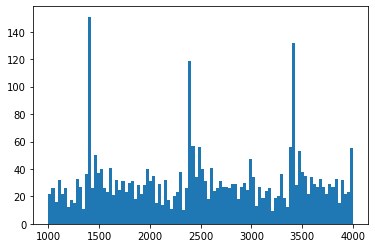

In [43]:
plt.hist(injected[0],bins=100)
plt.show()

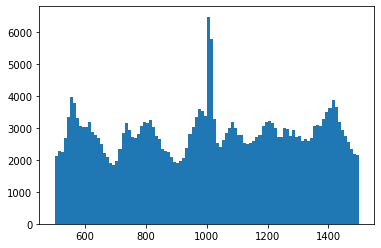

In [41]:
plt.hist(mc2_feat['time'],bins=100)
plt.show()

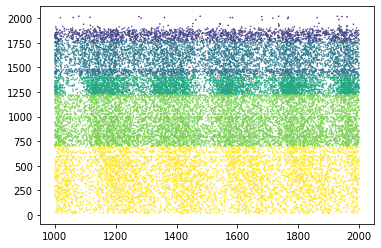

In [205]:
plt.scatter(mc2_feat['time'],mc2_feat['y'],s=0.25,c=mc2_feat['layer'])

In [201]:
mc2_feat.columns

Index(['x', 'y', 'z', 'synapse_class', 'layer', 'time', 'gid', 'gid2'], dtype='object')

In [186]:
mc2_feat10 = mc2_feat.loc[mc2_feat['gid2'].isin(cells_10percent)]

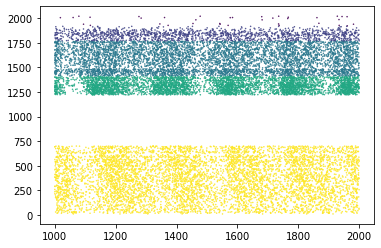

In [188]:
plt.scatter(mc2_feat10['time'],mc2_feat10['y'],s=0.25,c=mc2_feat10['layer'])

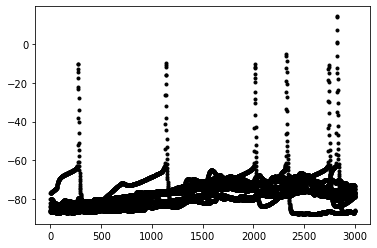

In [29]:
plt.plot(subm[0:10000,0:10],'k.')
plt.show()

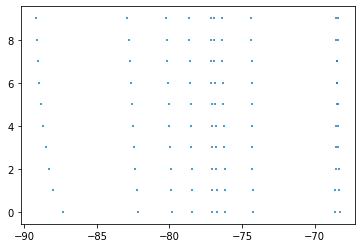

In [20]:
plt.eventplot(subm[0:10,0:10],linelengths=0.1)

#plt.savefig('./plots/subm_mc2_5k.png')

plt.show()

### L5 mc2 MC and TPCA with metab

In [6]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')

onepercent_gids = np.loadtxt("/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/mc2_onepercent_allLayers_EXCandINH_gids.txt")

onepercent_gids_str = [str(int(i)) for i in onepercent_gids]

In [7]:
L5_mc2 = c.cells.get({'$target': 'mc2_Column', Cell.LAYER: 5})
print(L5_mc2['morph_class'].unique())
L5_mc2[L5_mc2['morph_class']=="INT"]['mtype'].unique()

[INT, PYR]
Categories (2, object): [INT, PYR]


[L5_CHC, L5_LBC, L5_SBC, L5_NBC, L5_BTC, L5_DBC, L5_NGC, L5_MC, L5_BP]
Categories (9, object): [L5_CHC, L5_LBC, L5_SBC, L5_NBC, ..., L5_DBC, L5_NGC, L5_MC, L5_BP]

In [8]:
L5mc2_TPC_A = L5_mc2[L5_mc2['mtype']=='L5_TPC:A'].index.tolist()
L5mc2_TPC_Astr = [str(i) for i in L5mc2_TPC_A]

L5mc2_MC = L5_mc2[L5_mc2['mtype']=='L5_MC'].index.tolist()
L5mc2_MCstr = [str(i) for i in L5mc2_MC]


In [9]:
len(L5mc2_TPC_A) + len(L5mc2_MC)

2132

In [10]:
len(L5mc2_MC)

110

In [10]:
# bbp to h5

# module load nix/viz/brion
# module load brion
# compartmentConverter <filename>.bbp <filename>.h5

In [11]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_18nov2020/BlueConfig')
spikes = sim.spikes.get()  # only with out.dat

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/intel-19.0.4/py-numpy-1.17.3-nnaud5hhiq/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
spikes_df = pd.DataFrame(spikes)
spikes_df = spikes_df.reset_index()
spikes_df.head()

t    gid
0  1.250  87755
1  1.275  87538
2  1.275  87560
3  1.300  87194
4  1.300  87556

In [16]:
spikes_df2 = pd.merge(spikes_df, mc2_cells, left_on='gid',right_index=True, how='inner')

305664    1000.0
586923    2000.0
586922    2000.0
305662    1000.0
586920    2000.0
586925    2000.0
586927    2000.0
305663    1000.0
305665    1000.0
586926    2000.0
305660    1000.0
586924    2000.0
305661    1000.0
586921    2000.0
Name: t, dtype: float64

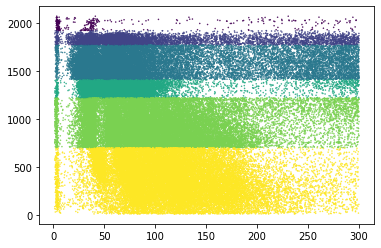

In [27]:
plt.scatter(spikes_df2.loc[((spikes_df2['t'] >=0) & (spikes_df2['t'] <=300)),'t'],
            spikes_df2.loc[((spikes_df2['t'] >=0) & (spikes_df2['t'] <=300)),'y'],
            s=0.25,c=spikes_df2.loc[((spikes_df2['t'] >=0) & (spikes_df2['t'] <=300)),'layer'])


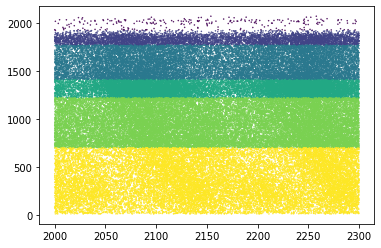

In [28]:
plt.scatter(spikes_df2.loc[((spikes_df2['t'] >=2000) & (spikes_df2['t'] <=2300)),'t'],
            spikes_df2.loc[((spikes_df2['t'] >=2000) & (spikes_df2['t'] <=2300)),'y'],
            s=0.25,c=spikes_df2.loc[((spikes_df2['t'] >=2000) & (spikes_df2['t'] <=2300)),'layer'])


In [23]:
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_18nov2020_18nov2020/out_vmv.txt')


Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [24]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_18nov2020_18nov2020/out_vmv.txt')
vmv.head()

time          2         3          6         11         21         31  \
0   0.0 -65.000000 -65.00000 -65.000000 -65.000000 -65.000000 -65.000000   
1   0.1 -65.157120 -65.18924 -65.083435 -65.206215 -65.168420 -65.136215   
2   0.2 -65.204994 -65.24127 -65.116710 -65.280396 -65.213370 -65.160164   
3   0.3 -65.204090 -65.23641 -65.128260 -65.295620 -65.220665 -65.129490   
4   0.4 -65.166360 -65.19135 -65.122444 -65.263060 -65.203190 -65.056520   

          39        48         49  ...     163211    163221     163231  \
0 -65.000000 -65.00000 -65.000000  ... -65.000000 -65.00000 -65.000000   
1 -65.125670 -65.15842 -65.137930  ... -65.207016 -65.44655 -65.392580   
2 -65.164200 -65.19833 -65.161380  ... -65.272770 -65.32105 -65.523990   
3 -65.165855 -65.19505 -65.129020  ... -65.283160 -64.92055 -65.554726   
4 -65.142944 -65.16003 -65.053314  ... -65.257920 -64.32400 -65.522220   

     163241     163250    163254    163255     163257    163260     163263  
0 -65.00000 -65.000000 -65.00000 -65.00000 -65.000000 -65.00000 -65.000000  
1 -65.30580 -65.217430 -65.39965 -65.13826 -65.172615 -65.11491 -65.128235  
2 -65.44089 -65.286970 -65.53355 -65.09049 -65.250880 -65.15506 -65.180725  
3 -65.49640 -65.297775 -65.56550 -64.95186 -65.281610 -65.15517 -65.194490  
4 -65.49726 -65.270966 -65.53265 -64.74878 -65.278600 -65.12590 -65.180530  

[5 rows x 22919 columns]

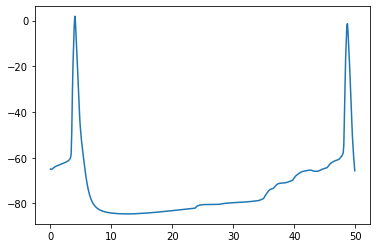

In [38]:
plt.plot(vmv.time,vmv['163255'])
plt.show()

In [ ]:
# subset for only some columns before running it, otherwise it's too long


stim_start = 0
stim_end = np.max(vmv.time)

feature_values = {}

for idx,cell_gid in enumerate(vmv.columns[1:len(vmv.columns)]):
    trace = {'T': vmv['time'], 'V': vmv[cell_gid], 'stim_start': [stim_start], 'stim_end': [stim_end]}

    if (list(efel.getFeatureValues([trace], ['mean_frequency'])[0].values())[0] is not None):
        feature_values[cell_gid] = list(efel.getFeatureValues([trace], ['mean_frequency'])[0].values())[0].tolist()[0]

fr = pd.DataFrame(feature_values.items(),columns = ['c_gid','mean_frequency'])
fr.head()        

In [34]:
fr = pd.DataFrame(feature_values.items(),columns = ['c_gid','mean_frequency'])
fr.head()        

c_gid  mean_frequency
0     2       67.114094
1     3       26.455026
2     6       21.978022
3    11      294.117647
4    21       34.722222

In [35]:
len(fr)

5233

In [11]:
#! less /gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_28july2020/BlueConfig

In [ ]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_28july2020/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_28july2020_L5mc2_MC_TPCA/out_vmv.txt')

report = sim.report('NaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_28july2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_28july2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')

report = sim.report('ADPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_28july2020_L5mc2_MC_TPCA/ADPConcAllCmps.txt')


report = sim.report('KConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_28july2020_L5mc2_MC_TPCA/KConcAllCmps.txt')

report = sim.report('CaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_28july2020_L5mc2_MC_TPCA/CaConcAllCmps.txt')


In [9]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_1percentCells/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/out_vmv.txt')

report = sim.report('NaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/ATPConcAllCmps.txt')

report = sim.report('ADPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/ADPConcAllCmps.txt')


report = sim.report('KConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/KConcAllCmps.txt')

report = sim.report('CaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/CaConcAllCmps.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [10]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/out_vmv.txt')
nai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/NaConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/ATPConcAllCmps.txt')
adp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/ADPConcAllCmps.txt')
ki = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/KConcAllCmps.txt')
cai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/CaConcAllCmps.txt')


In [4]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all/BlueConfig')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run


In [ ]:
report = sim.report('ATPConcAllCmps', source='h5')
data = report.get()
##data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_1percentCells_p150_4nov2020/ATPConcAllCmps.txt')
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_all_13nov2020/ATPConcAllCmps.txt')


In [5]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all/BlueConfig')

report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_all_13nov2020/out_vmv.txt')


Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [ ]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_all_10/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_all_10_15nov2020/out_vmv.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


In [6]:
report

sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all/BlueConfig')
#spikes = sim.spikes.get()  # only with out.dat

In [6]:
!ls /gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_all_13nov2020/


ADPConcAllCmps.bbp  ATPConcAllCmps.txt	KConcAllCmps.h5    soma.h5
ADPConcAllCmps.h5   CaConcAllCmps.bbp	NaConcAllCmps.bbp
ATPConcAllCmps.bbp  CaConcAllCmps.h5	NaConcAllCmps.h5
ATPConcAllCmps.h5   KConcAllCmps.bbp	soma.bbp


In [ ]:
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_all_13nov2020/ATPConcAllCmps.txt')


In [ ]:
atp.head()

In [6]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all_23nov2020/BlueConfig')

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run


In [7]:
sim.spikes.get()

FileNotFoundError: [Errno 2] File /gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_all_23nov2020/out.dat does not exist: '/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_v3_all_23nov2020/out.dat'

vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_13july2020_L5mc2_MC_TPCA/out_vmv.txt')
nai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_13july2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_13july2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_13july2020_L5mc2_MC_TPCA/ADPConcAllCmps.txt')
ki = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_13july2020_L5mc2_MC_TPCA/KConcAllCmps.txt')
cai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_13july2020_L5mc2_MC_TPCA/CaConcAllCmps.txt')


In [12]:
vmv.head()

time        109       1262       1625       1936      2300       4341  \
0   0.0 -65.000000 -65.000000 -65.000000 -65.000000 -65.00000 -65.000000   
1   0.1 -65.104880 -64.958020 -64.964005 -64.970160 -64.96738 -64.967230   
2   0.2 -65.141700 -64.868996 -64.884910 -64.898094 -64.89342 -64.894090   
3   0.3 -65.147610 -64.750520 -64.776764 -64.793770 -64.79036 -64.792786   
4   0.4 -65.128395 -64.608900 -64.644720 -64.661760 -64.66334 -64.667970   

        5451       5674       6682  ...    156723     157286    157878  \
0 -65.000000 -65.000000 -65.000000  ... -65.00000 -65.000000 -65.00000   
1 -64.966590 -64.975800 -64.971490  ... -65.09220 -65.092545 -65.10646   
2 -64.893814 -64.920784 -64.905130  ... -65.06831 -65.064770 -65.07439   
3 -64.793920 -64.842670 -64.811516  ... -64.99276 -64.983480 -64.98585   
4 -64.671530 -64.744430 -64.695370  ... -64.87870 -64.862595 -64.85860   

      160073     160900     161579    162034     162105    162241    162344  
0 -65.000000 -65.000000 -65.000000 -65.00000 -65.000000 -65.00000 -65.00000  
1 -65.111720 -65.099710 -65.149826 -65.09622 -65.079300 -65.14627 -65.09522  
2 -65.105095 -65.076200 -65.108560 -65.08711 -65.065720 -65.02623 -65.12686  
3 -65.044940 -65.000250 -64.983500 -65.02788 -65.002754 -64.77852 -65.12792  
4 -64.945140 -64.885635 -64.798950 -64.93055 -64.901100 -64.42535 -65.10586  

[5 rows x 231 columns]

In [26]:
stim_start = 1
stim_end = 5000


trace = {'T': vmv['time'], 'V': vmv['1262'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}



In [48]:
from IPython.display import HTML

HTML(json2html.convert(json=feature_values))

In [ ]:
feature_values.keys()

### L5 mc2 MC and TPCA without metab

In [ ]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet_28july2020/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/out_vmv.txt')

report = sim.report('NaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')

report = sim.report('ADPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/ADPConcAllCmps.txt')


report = sim.report('KConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/KConcAllCmps.txt')

report = sim.report('CaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/CaConcAllCmps.txt')


In [12]:
vmv2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/out_vmv.txt')
nai2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')
atp2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')
adp2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/ADPConcAllCmps.txt')
ki2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/KConcAllCmps.txt')
cai2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/CaConcAllCmps.txt')


FileNotFoundError: [Errno 2] File b'/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/out_vmv.txt' does not exist: b'/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/noMet_p150_28july2020_L5mc2_MC_TPCA/out_vmv.txt'

In [28]:

trace2 = {'T': vmv['time'], 'V': vmv['109'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values2 = efel.getFeatureValues([trace2], ['AP_amplitude', 'peak_time', 'peak_voltage', 
                                                   'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values2 = {feature_name: list(values) for feature_name, values in feature_values2.items()}



In [39]:
len(v)

83

In [37]:
feature_valuesDiff = {}

for k,v in feature_values.items():
    v2 = feature_values2.get(k, 0)
    dv = []
    
    for i,lv in enumerate(v):
        dv.append(np.median(lv) - np.median(v2[i]))
        #print(i)
        #np.median(v2[i])
        
    feature_valuesDiff[k] = dv

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


IndexError: list index out of range

In [18]:
feature_valuesDiff['mean_frequency']

[-1.3049467426837644]

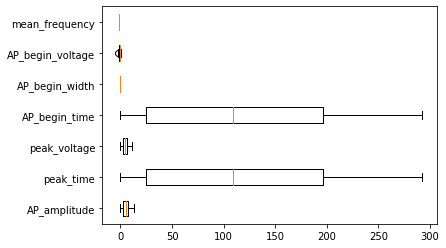

In [19]:
#162419

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

In [20]:
feature_valuesDiff.pop('AP_begin_time')
feature_valuesDiff.pop('peak_time')

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.20000000000004547,
 4.799999999995634,
 10.899999999990087,
 19.199999999982538,
 22.399999999979627,
 25.3999999999769,
 25.499999999976808,
 32.39999999997053,
 37.79999999996562,
 43.799999999960164,
 44.29999999995971,
 50.49999999995407,
 51.39999999995325,
 56.79999999994834,
 56.89999999994825,
 60.29999999994516,
 68.4999999999377,
 72.19999999993433,
 73.79999999993288,
 73.9999999999327,
 79.39999999992779,
 83.09999999992442,
 84.49999999992315,
 88.29999999991969,
 97.69999999991114,
 100.19999999990887,
 98.89999999991005,
 102.09999999990714,
 107.59999999990214,
 106.79999999990287,
 110.29999999989968,
 115.9999999998945,
 119.69999999989113,
 115.9999999998945,
 120.99999999988995,
 124.8999999998864,
 126.29999999988513,
 128.1999999998834,
 131.89999999988004,
 137.9999999998745,
 143.99999999986903,
 148.59999999986485,
 154.09999999985985,
 15

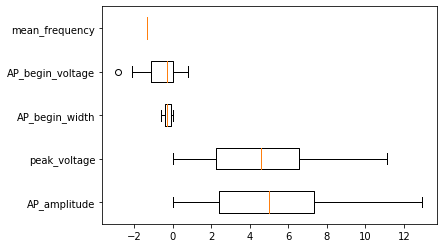

In [21]:
#162419

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

In [20]:
len(onepercent_gids_str)

230

In [4]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_nostim_noSkip/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()

`brain` module not found. Using experimental fallback implementation for H5 report access.


In [18]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/setup_sim/sim4fig/gen_diff_pulses/linamp1long/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()

data = data.reset_index()

In [15]:
onepercent_gids[0:round(len(onepercent_gids)/4)]

array([  109.,  1262.,  1625.,  1936.,  2300.,  4341.,  5451.,  5674.,
        6682.,  9570., 10099., 10184., 10536., 12989., 13704., 13801.,
       13861., 13909., 14049., 15561., 15788., 16305., 16327., 16656.,
       17537., 17740., 18212., 20432., 20585., 20632., 21198., 22602.,
       23911., 23936., 24536., 24823., 26749., 26945., 27199., 27971.,
       28231., 28647., 31135., 32309., 33866., 34195., 36575., 37380.,
       38348., 38551., 38971., 39057., 40532., 40553., 41913., 42934.,
       44337., 45527.])

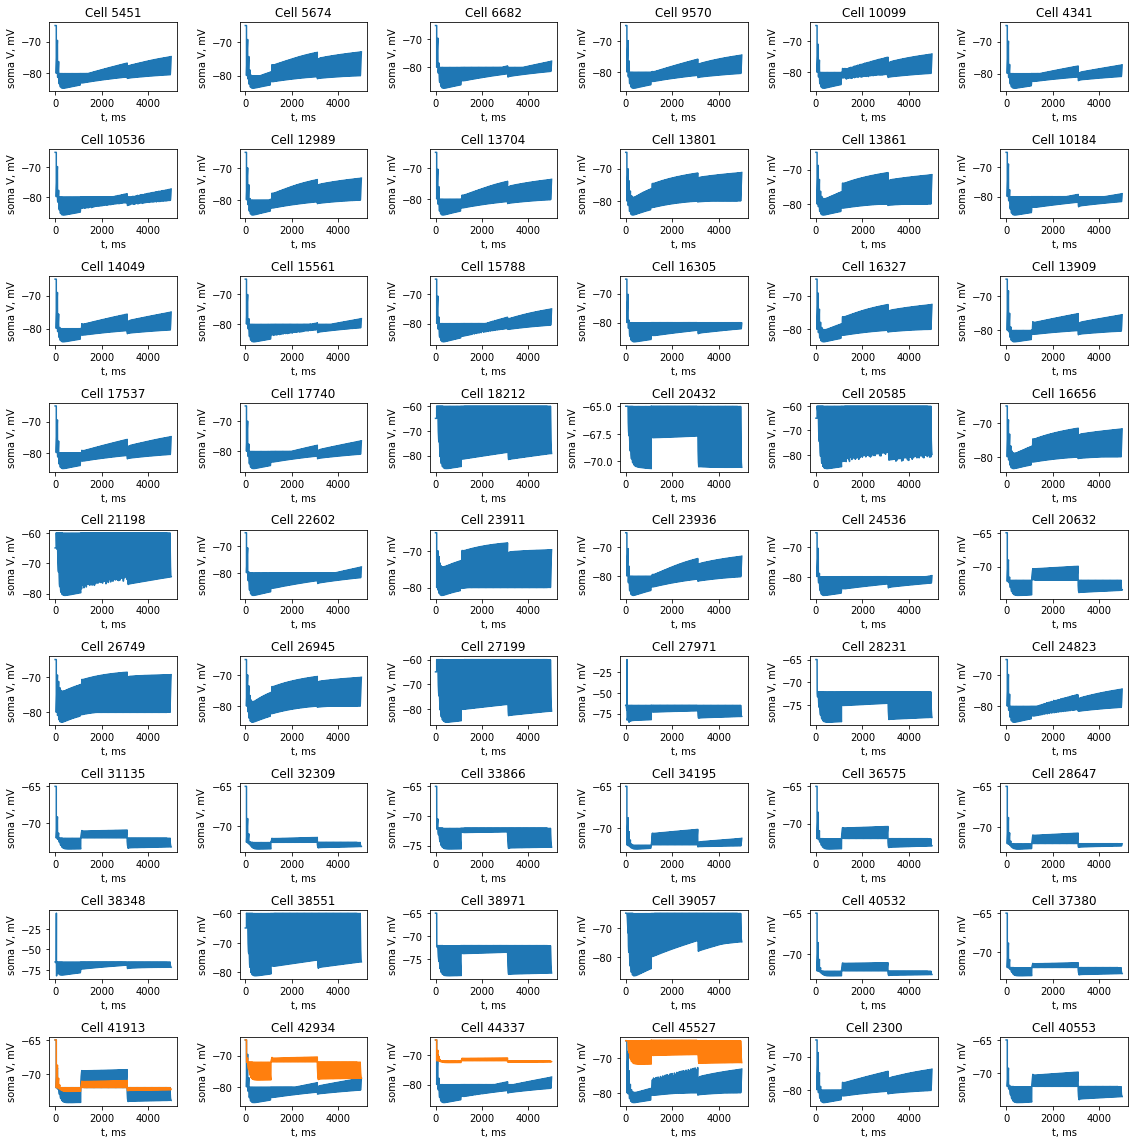

In [19]:
# gen met linamp1 

fig, axs = plt.subplots(int(round(len(onepercent_gids)/4)/6),6,figsize=(16,16))

for i,c in enumerate(data.loc[:,["time"] + [int(idx) for idx in onepercent_gids[0:round(len(onepercent_gids)/4)] ] ]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(data['time'],data[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

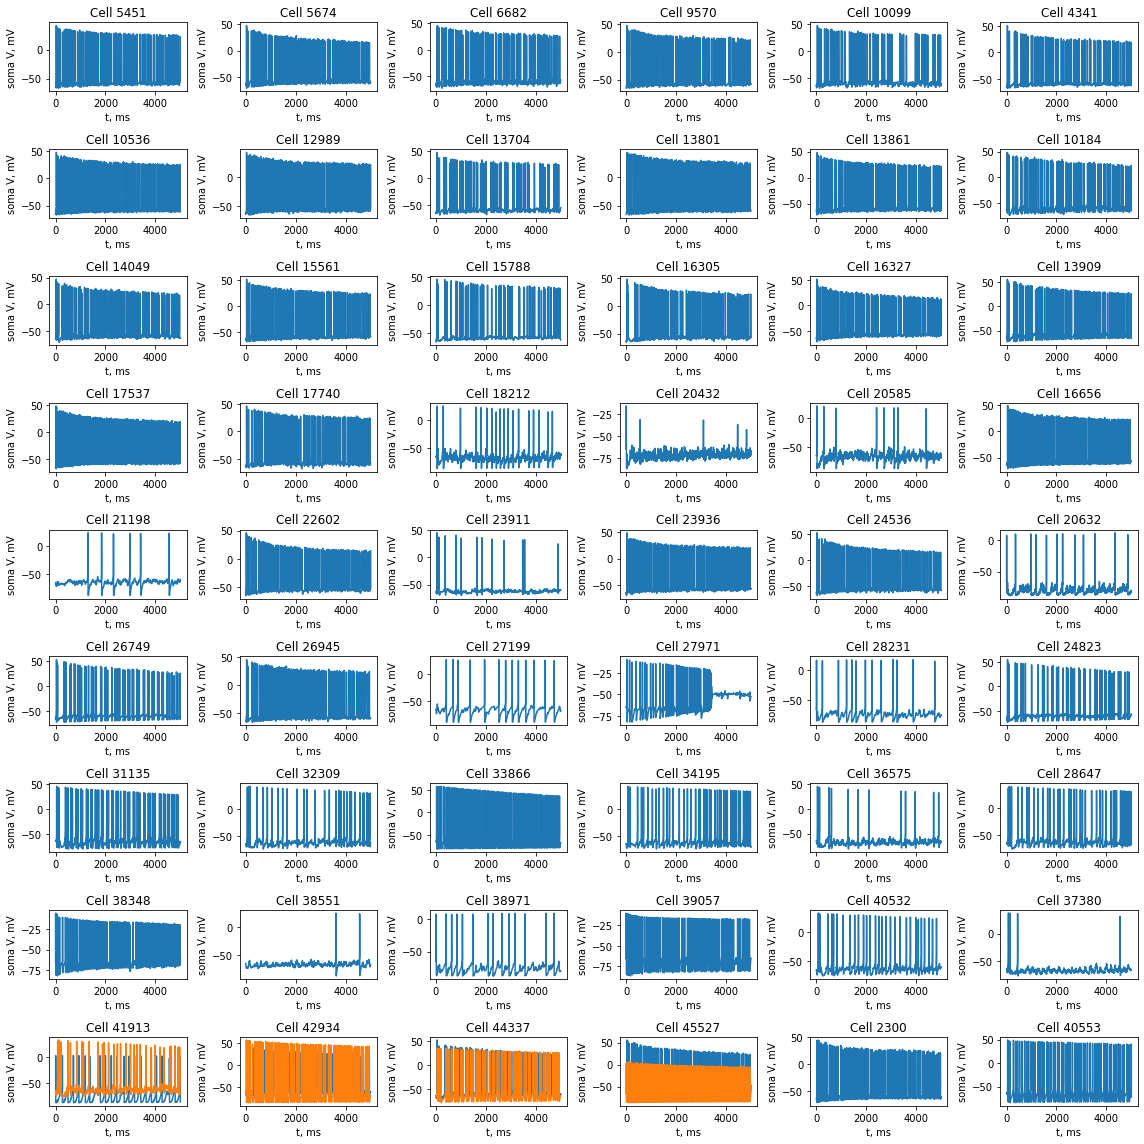

In [16]:
# nometnostim 

fig, axs = plt.subplots(int(round(len(onepercent_gids)/4)/6),6,figsize=(16,16))

for i,c in enumerate(data.loc[:,["time"] + [int(idx) for idx in onepercent_gids[0:round(len(onepercent_gids)/4)] ] ]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(data['time'],data[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

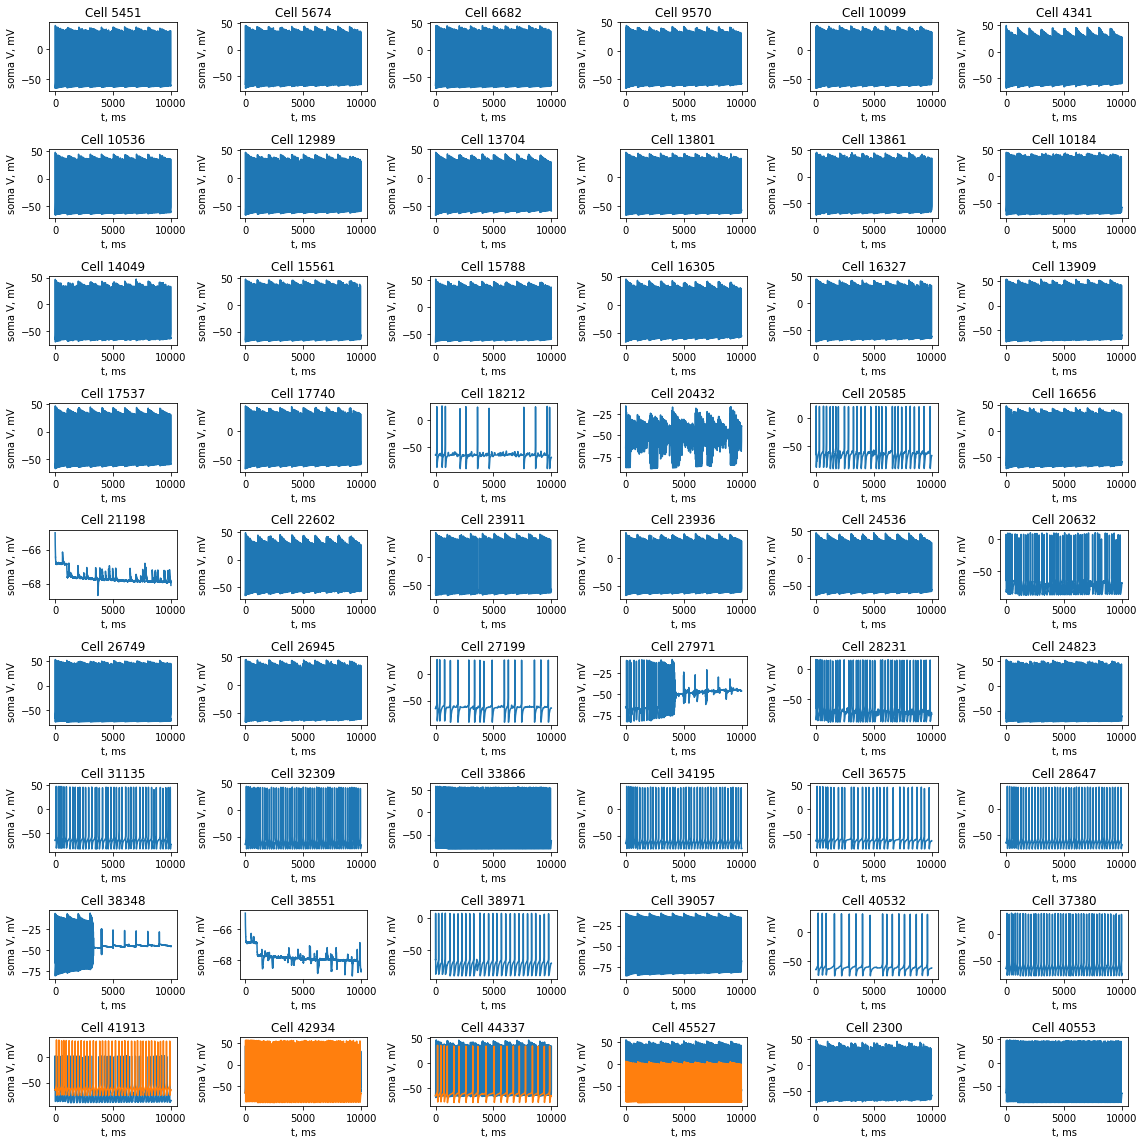

In [25]:
# with met

fig, axs = plt.subplots(int(round(len(onepercent_gids_str)/4)/6),6,figsize=(16,16))

for i,c in enumerate(vmv.loc[:,["time"] + onepercent_gids_str[0:round(len(onepercent_gids_str)/4)]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

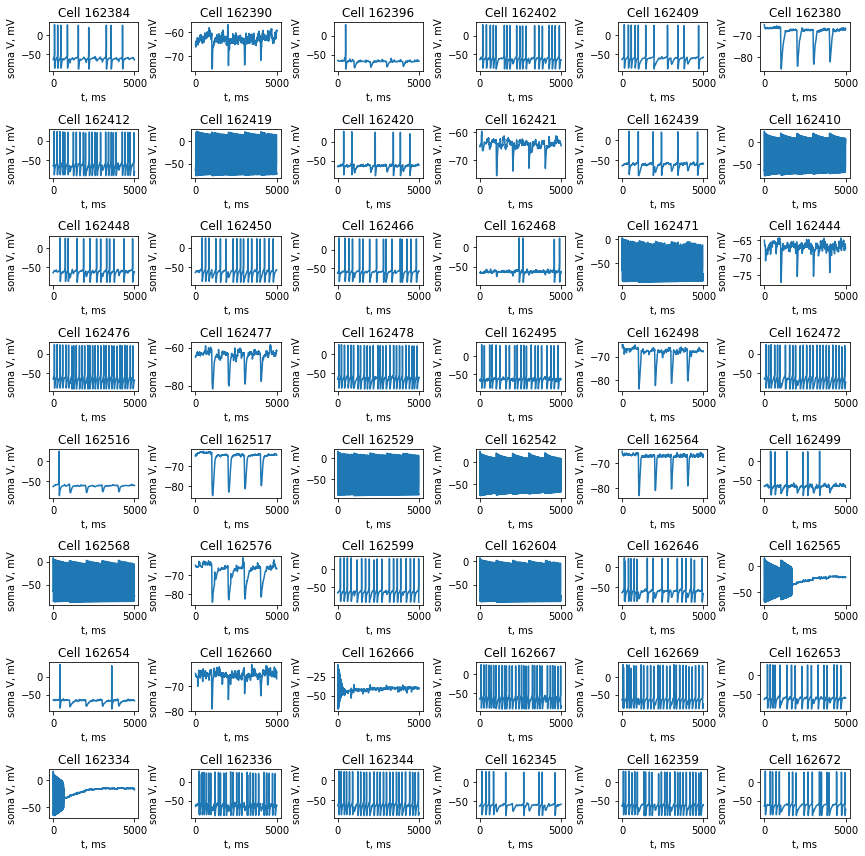

In [22]:
# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_vmv_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_vmv_L5mc2_MC_withMet.png')


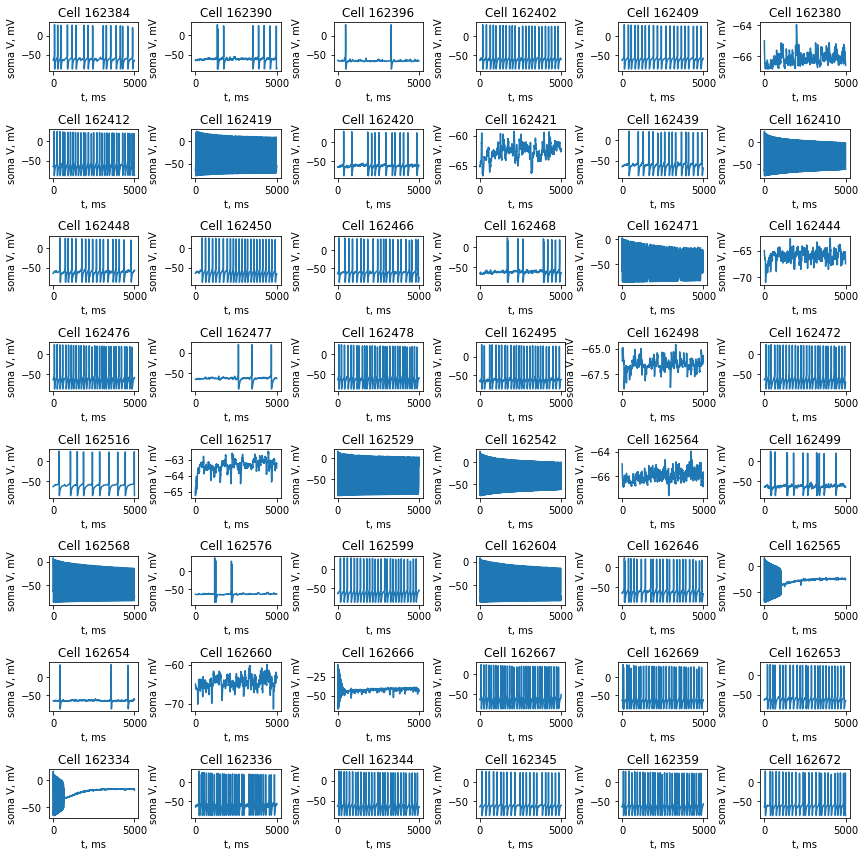

In [23]:
# no met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv2['time'],vmv2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

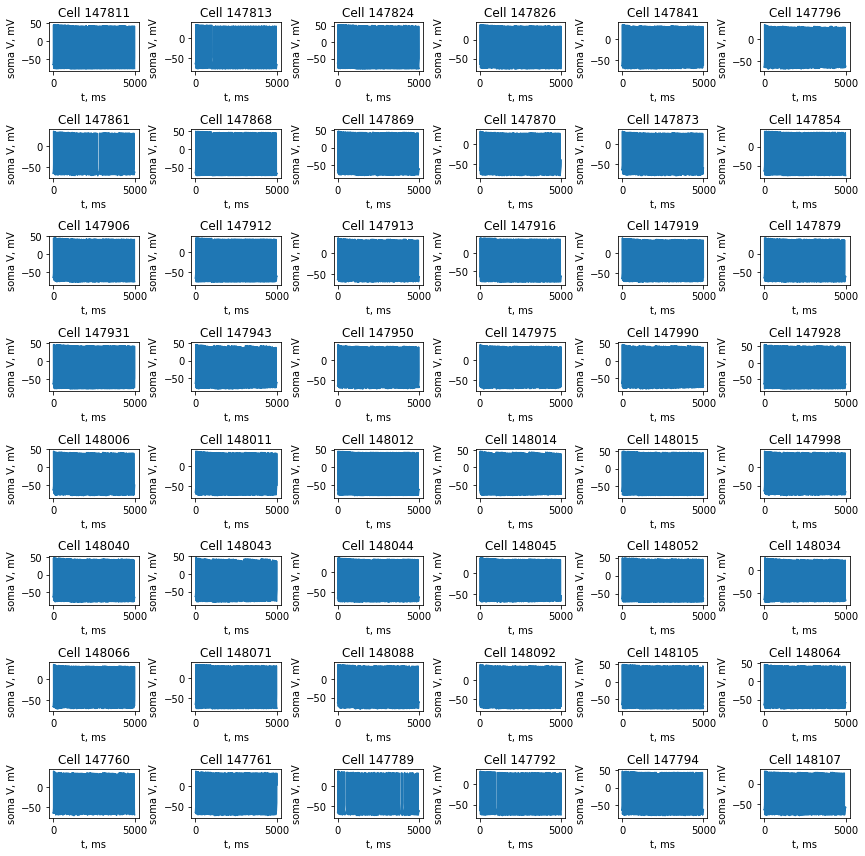

In [24]:
# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_vmv_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_vmv_L5mc2_TPCA_withMet.png')


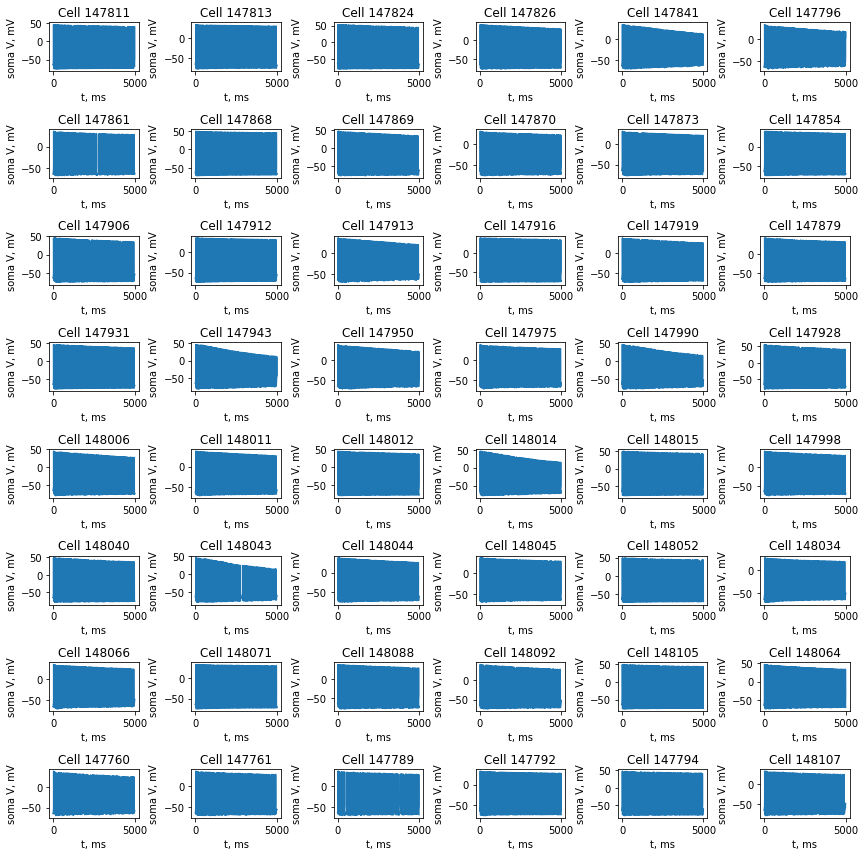

In [25]:
# no met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv2['time'],vmv2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

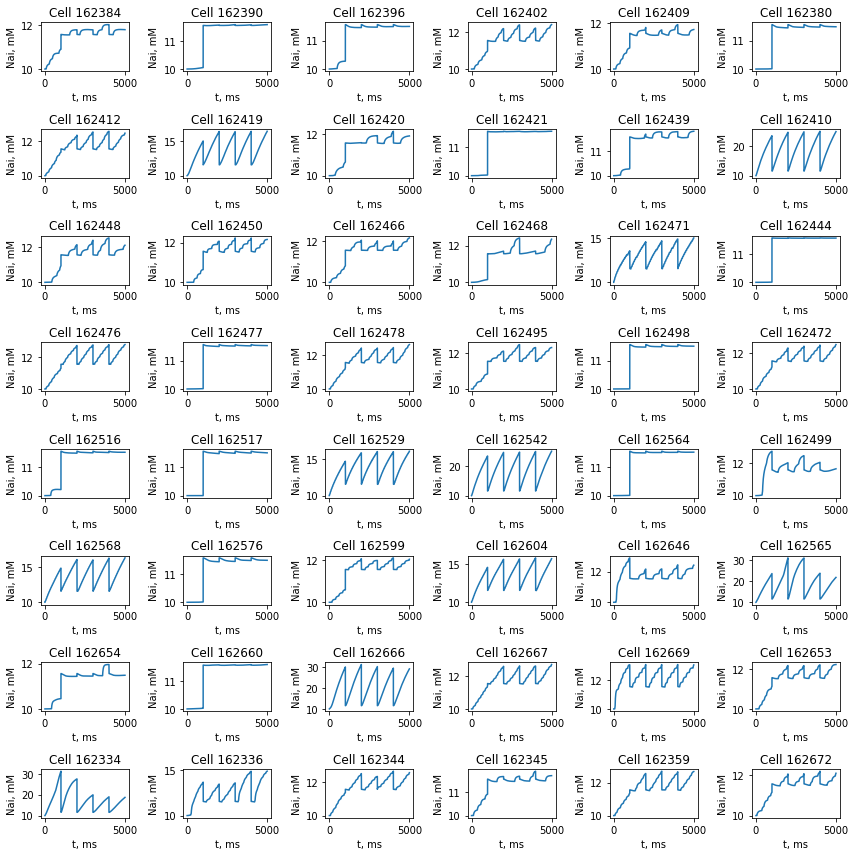

In [26]:
#with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_MC_withMet.png')


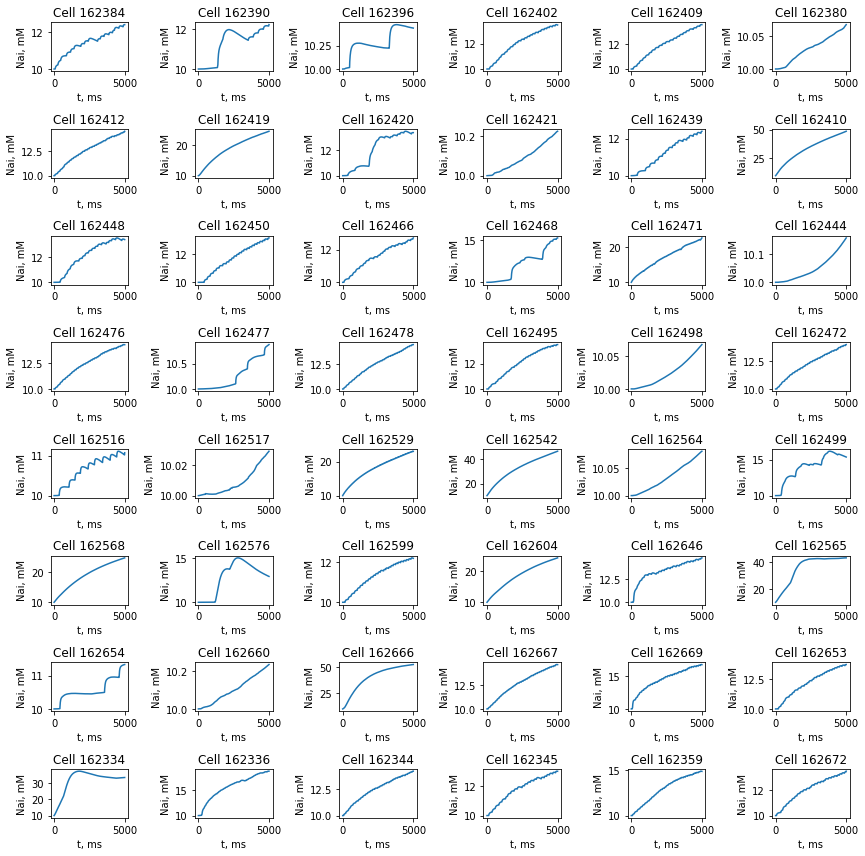

In [27]:
# no met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai2['time'],nai2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()


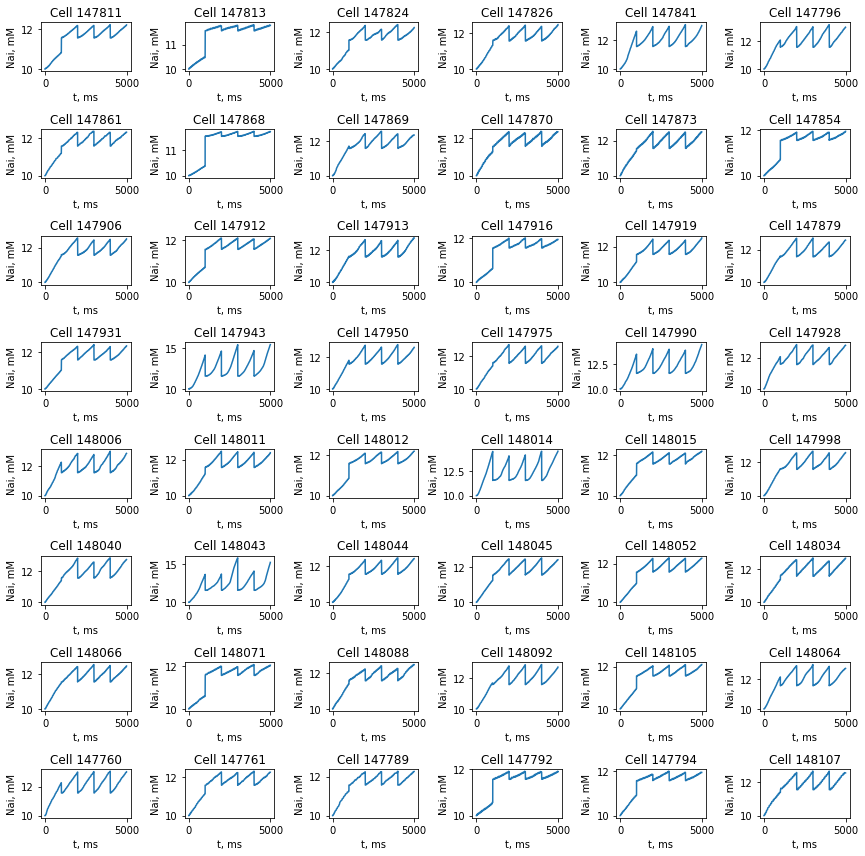

In [28]:
#with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_TPCA_withMet.png')


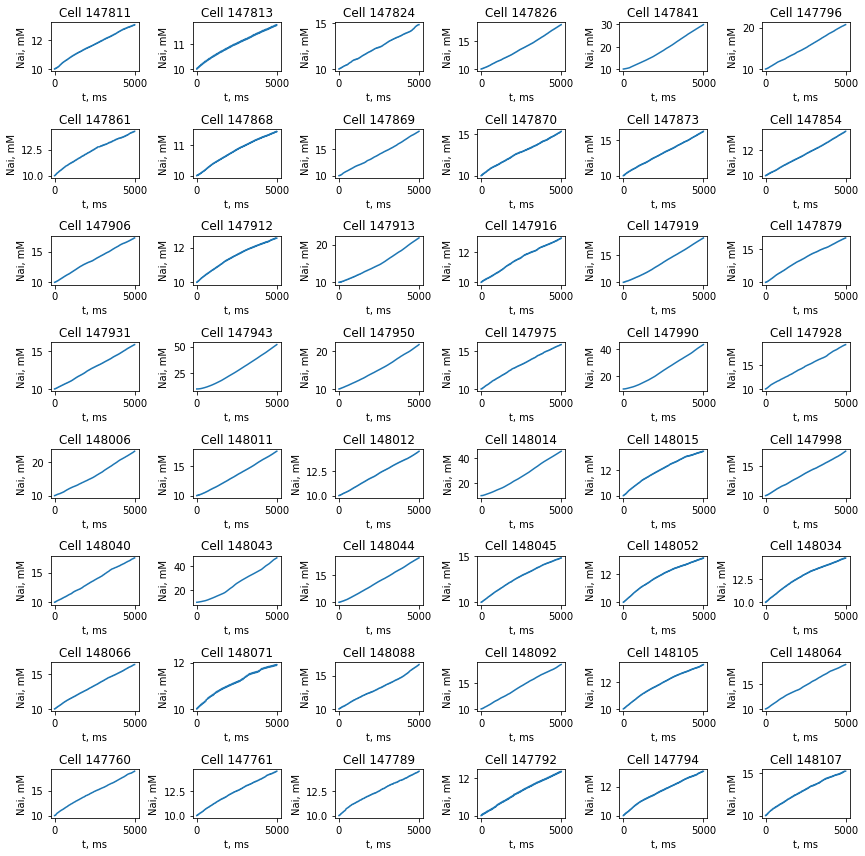

In [29]:
# no met

fig, axs = plt.subplots(8,6,figsize=(12,12))


for i,c in enumerate(nai2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai2['time'],nai2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()



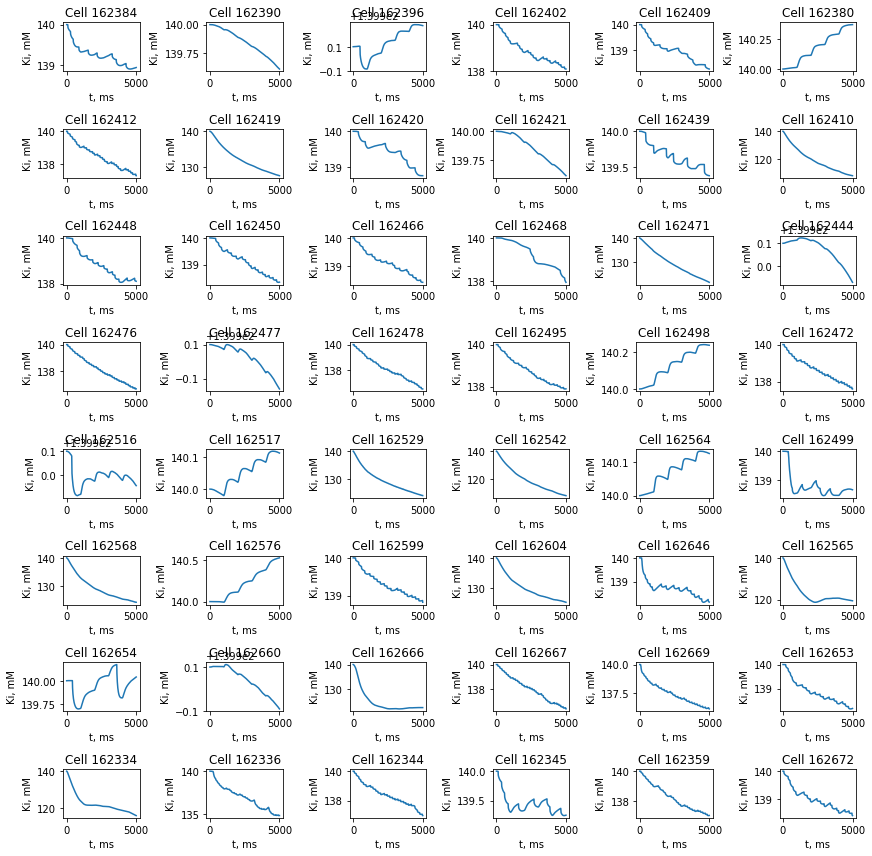

In [30]:
# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_MC_withMet.png')


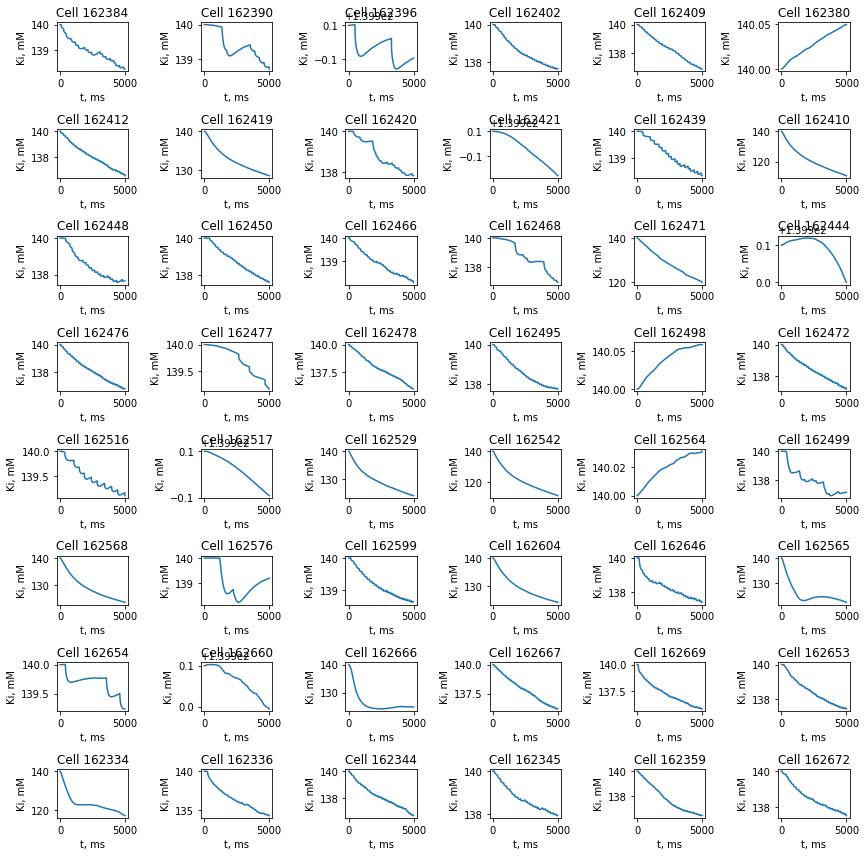

In [31]:
# no met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki2['time'],ki2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()


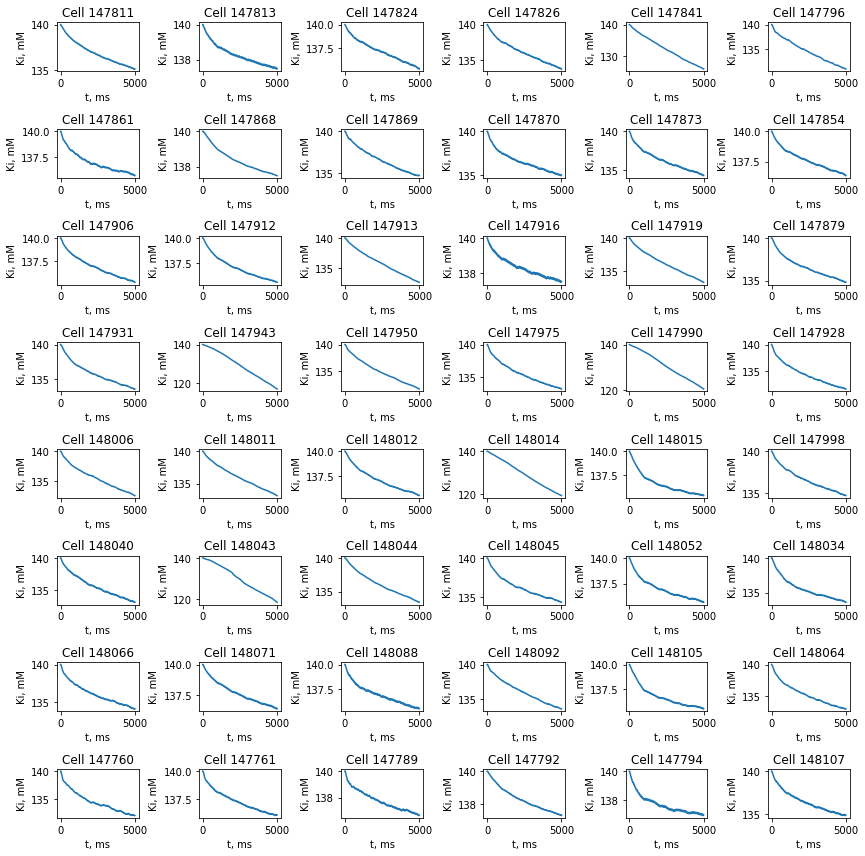

In [32]:
# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.png')


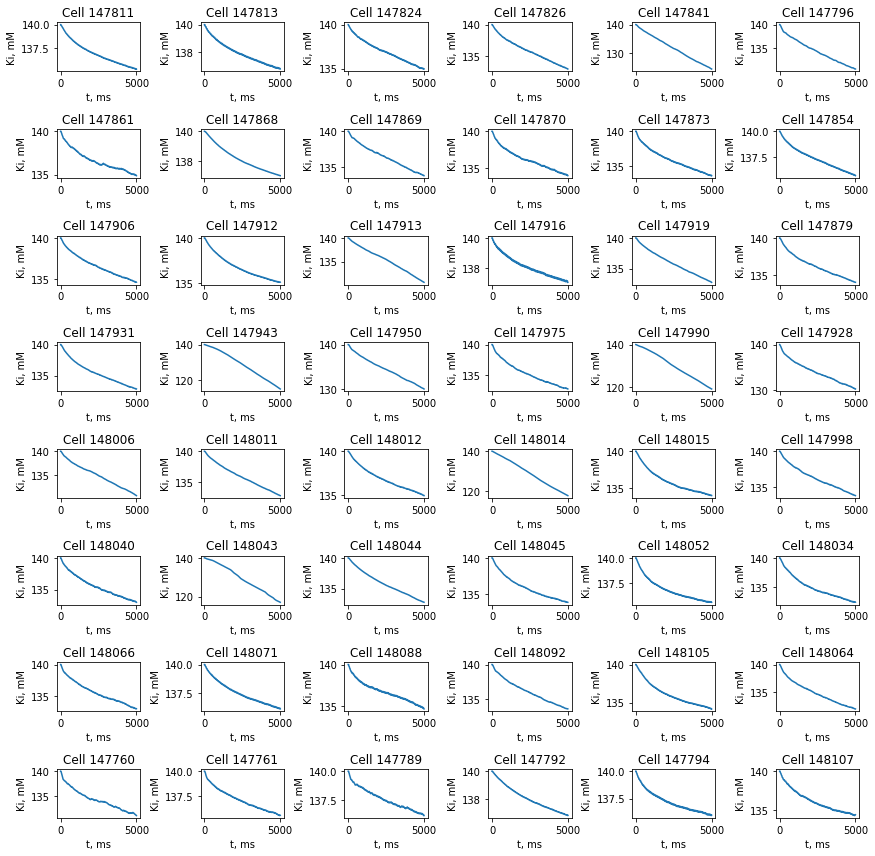

In [33]:
#no met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki2['time'],ki2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.png')


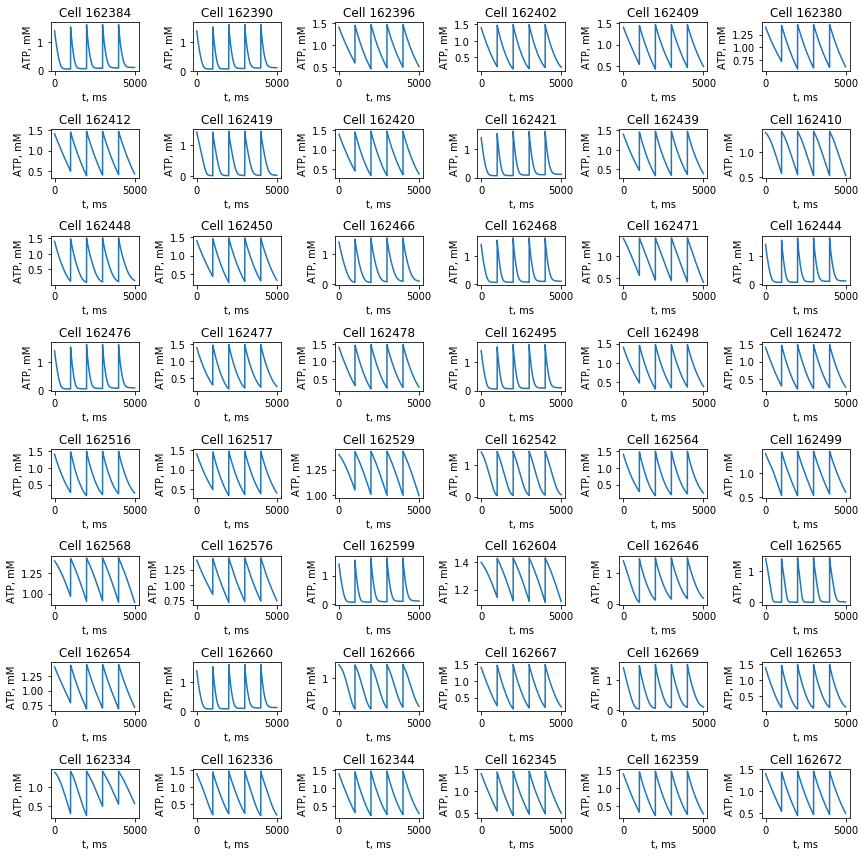

In [34]:
#with  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.png')


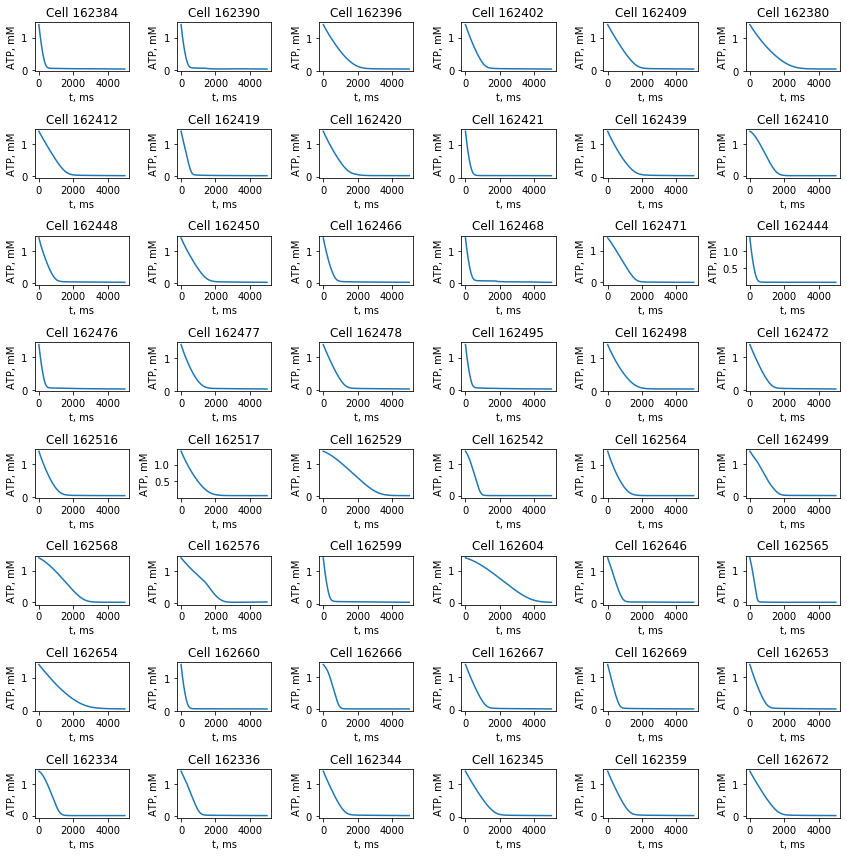

In [35]:
#no  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp2['time'],atp2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.png')


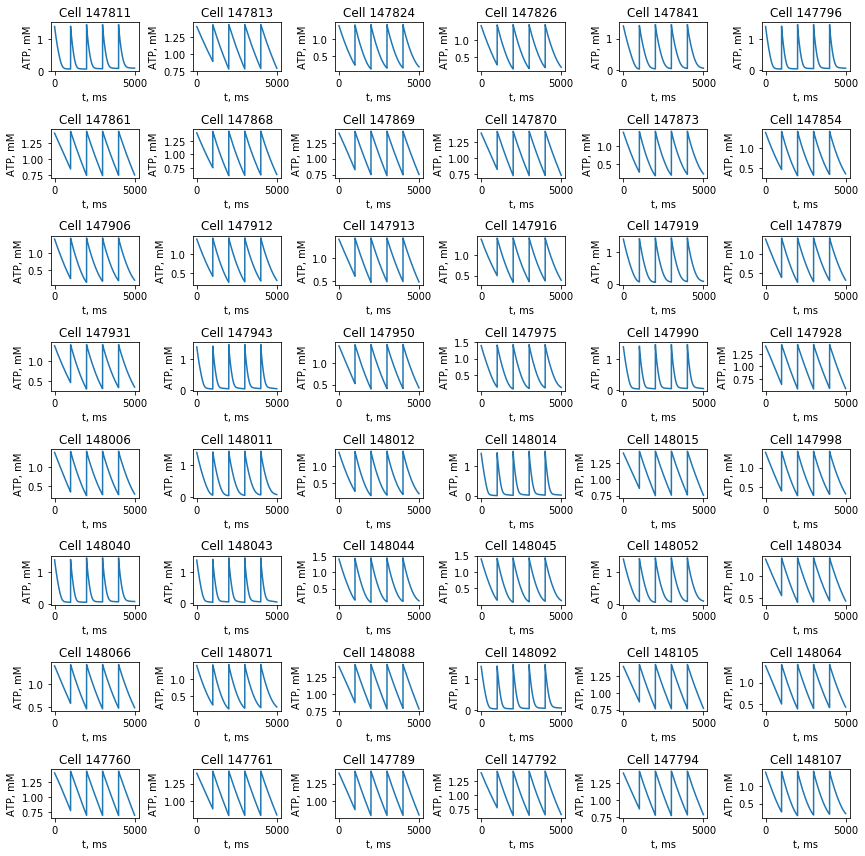

In [36]:
# with  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.png')


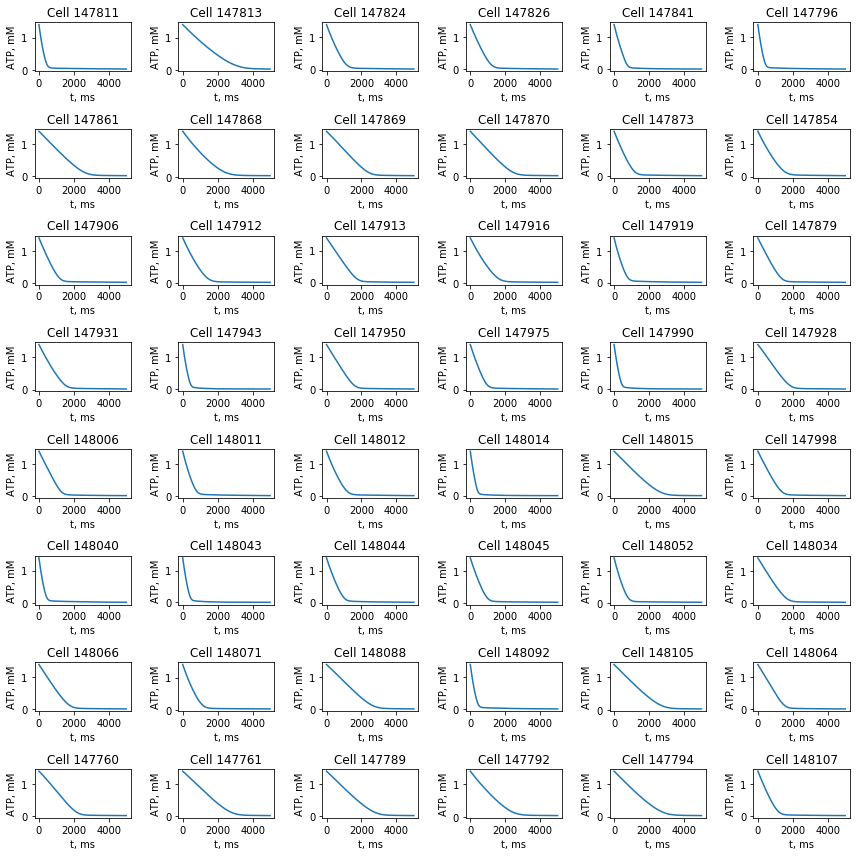

In [37]:
# no  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp2['time'],atp2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.png')


### L5 mc2 MC and TPCA without metab

In [23]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/BlueConfig')
report = sim.report('soma')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/out_vmv.txt')

report = sim.report('NaConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/ATPConcAllCmps.txt')


report = sim.report('KConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/KConcAllCmps.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'


In [24]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/out_vmv.txt')
nai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/NaConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/ATPConcAllCmps.txt')
ki = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/KConcAllCmps.txt')


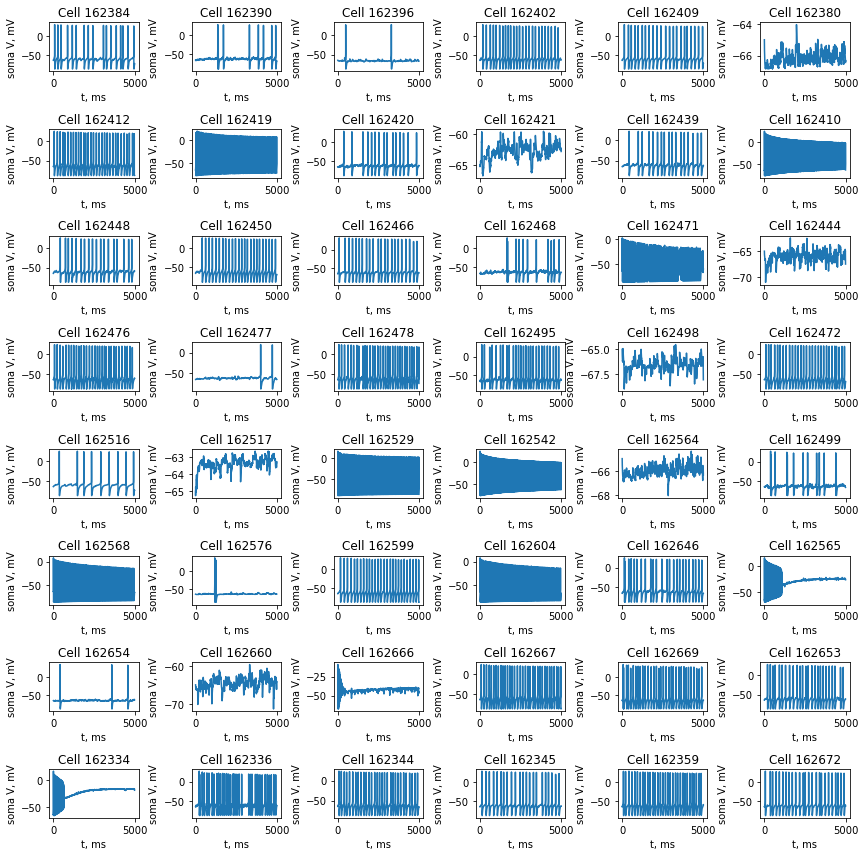

In [25]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_MC_noMet.png')


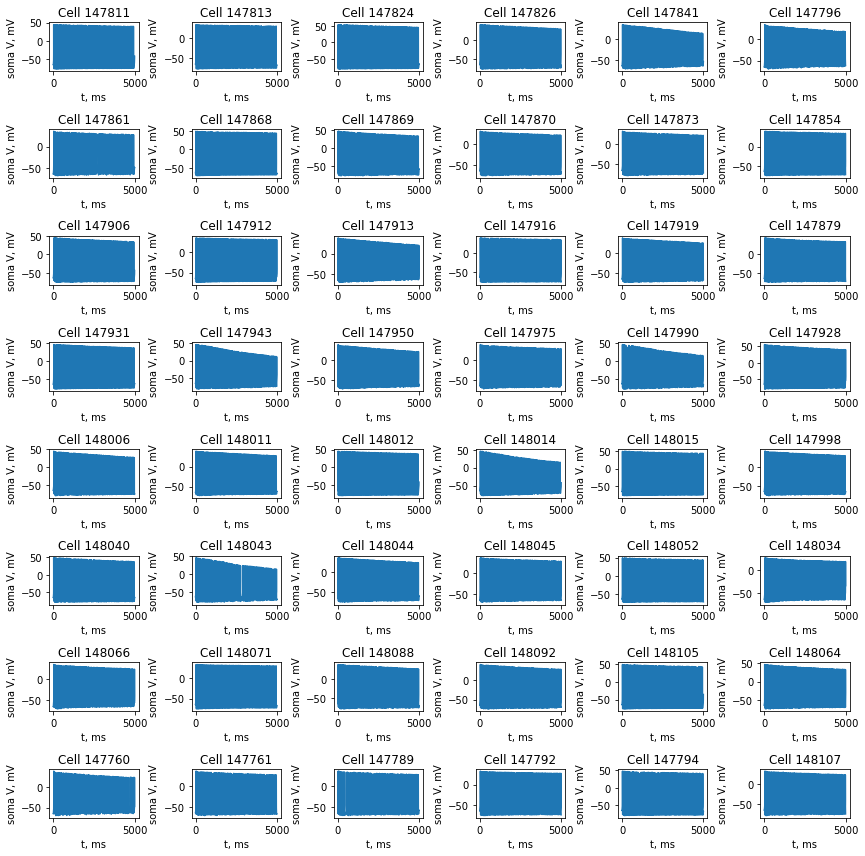

In [26]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_TPCA_noMet.png')


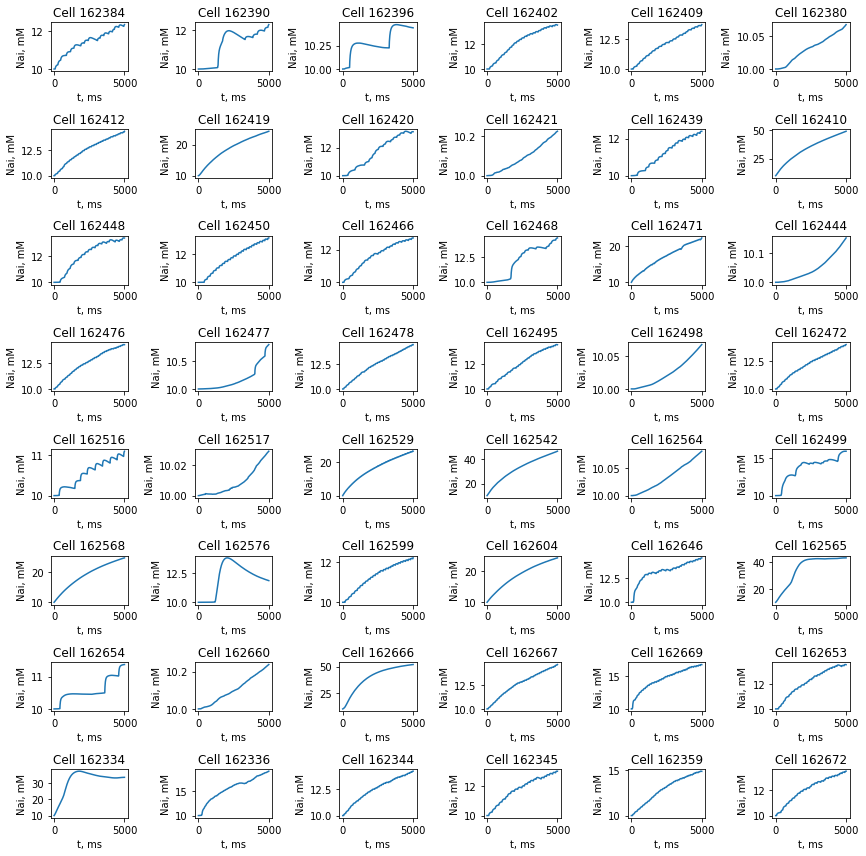

In [27]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_MC_noMet.png')


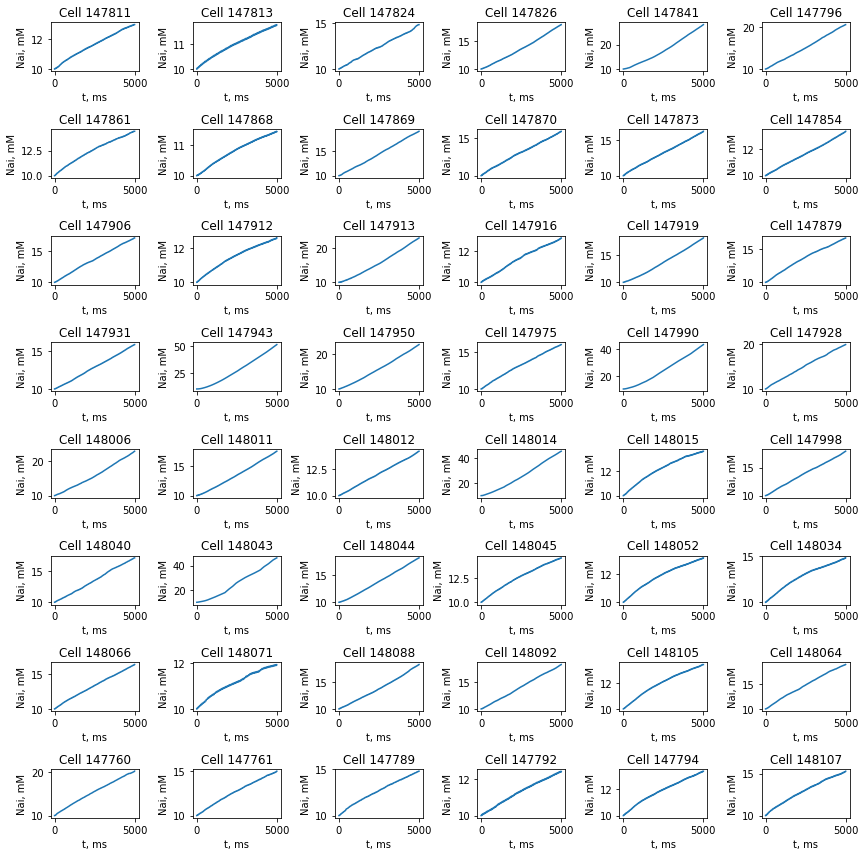

In [28]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_TPCA_noMet.png')


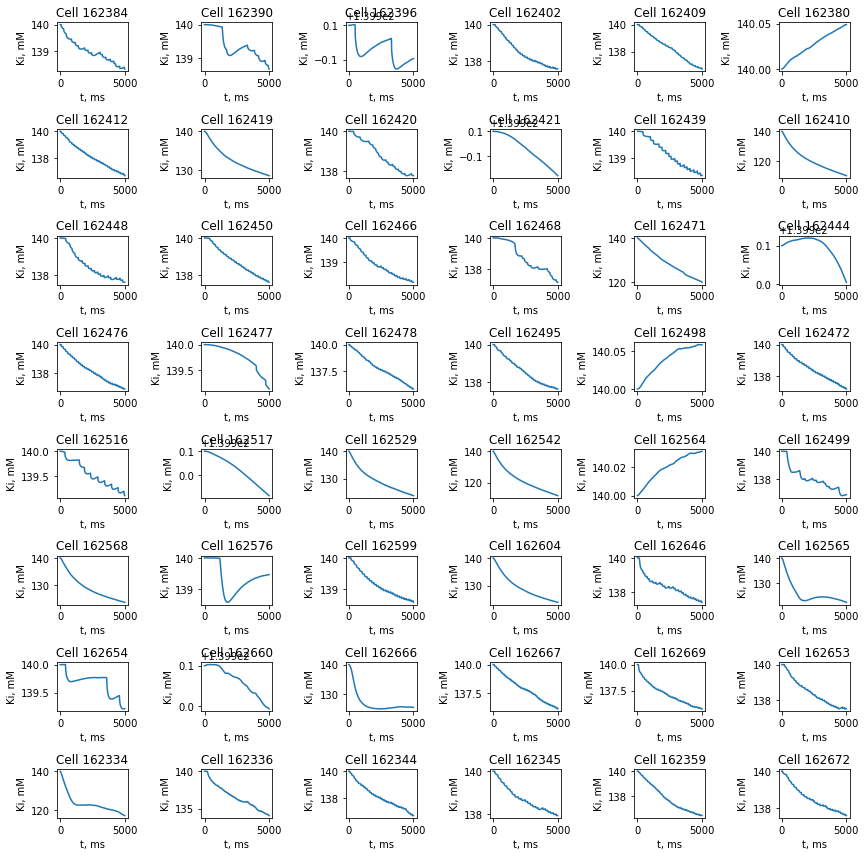

In [29]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_MC_noMet.png')


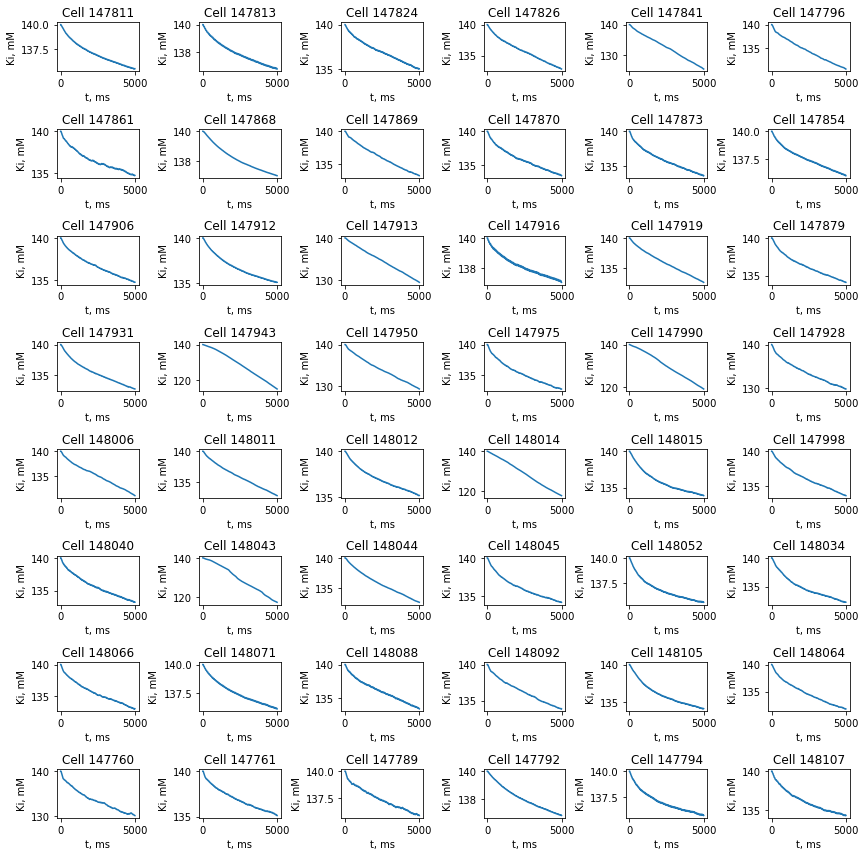

In [30]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_TPCA_noMet.png')


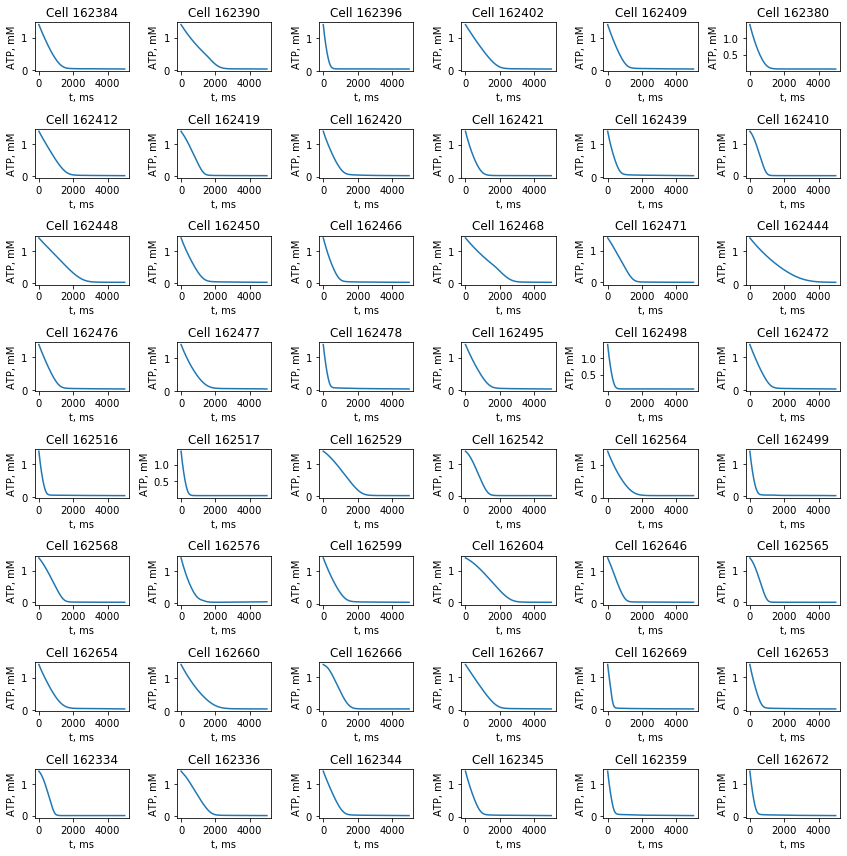

In [31]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_MC_noMet.png')


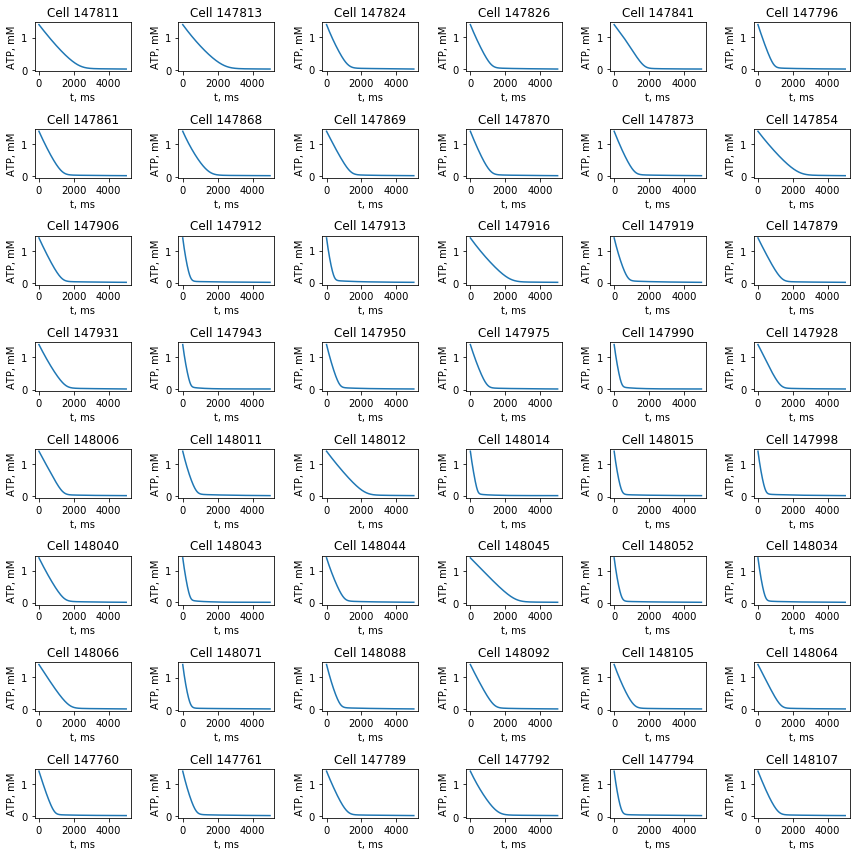

In [32]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_TPCA_noMet.png')


In [31]:
outs_r_glut_withMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_withMet_202006250820.tsv',header=None,sep='\t')

outs_r_gaba_withMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_withMet_202006250820.tsv',header=None,sep='\t')


outs_r_glut_noMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_noMet_202006250821.tsv',header=None,sep='\t')

outs_r_gaba_noMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_noMet_202006250821.tsv',header=None,sep='\t')




In [32]:
outs_r_glut_withMet['time, ms'] = 1000*(outs_r_glut_withMet[0]+1)
outs_r_gaba_withMet['time, ms'] = 1000*(outs_r_gaba_withMet[0]+1)

outs_r_glut_noMet['time, ms'] = 1000*(outs_r_glut_noMet[0]+1)
outs_r_gaba_noMet['time, ms'] = 1000*(outs_r_gaba_noMet[0]+1)

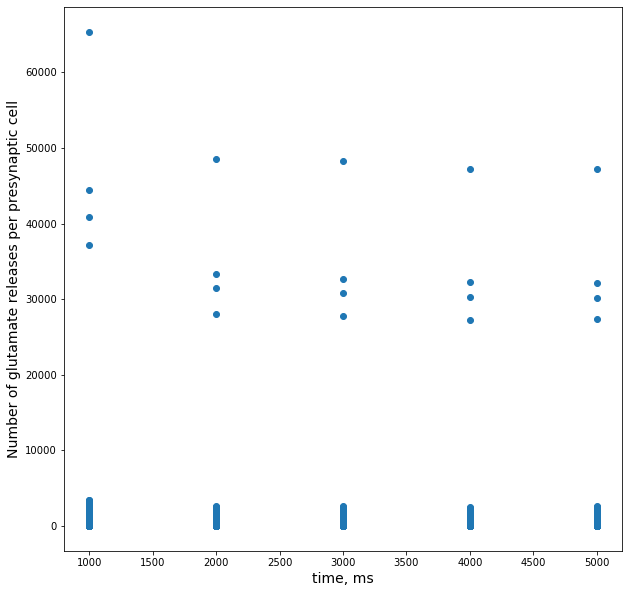

In [33]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_withMet['time, ms'],outs_r_glut_withMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.png')


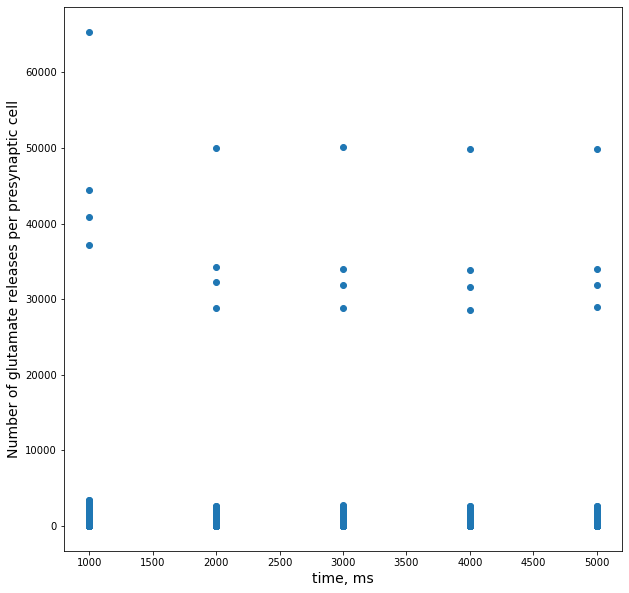

In [34]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_noMet['time, ms'],outs_r_glut_noMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.png')


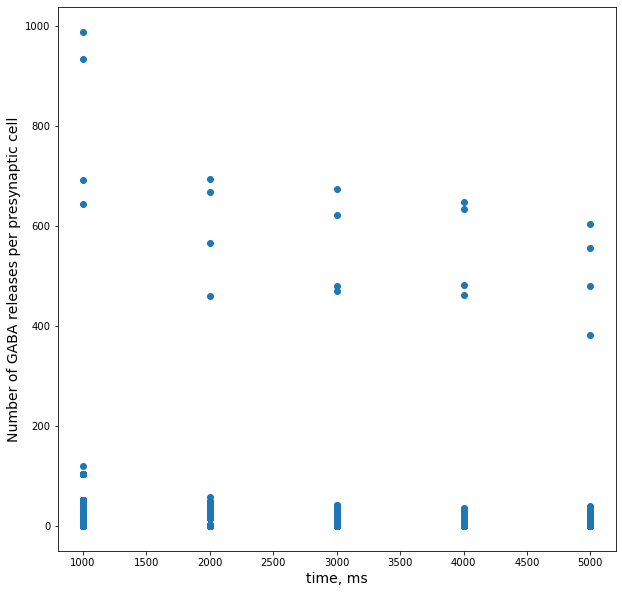

In [35]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_withMet['time, ms'],outs_r_gaba_withMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.png')


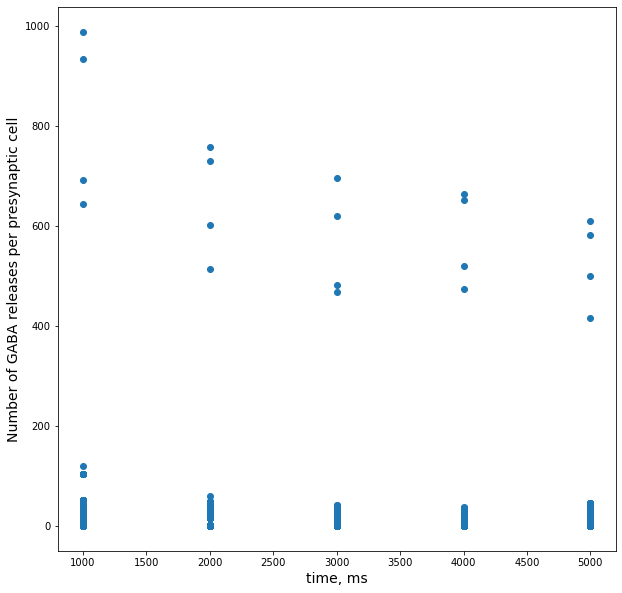

In [36]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_noMet['time, ms'],outs_r_gaba_noMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.png')


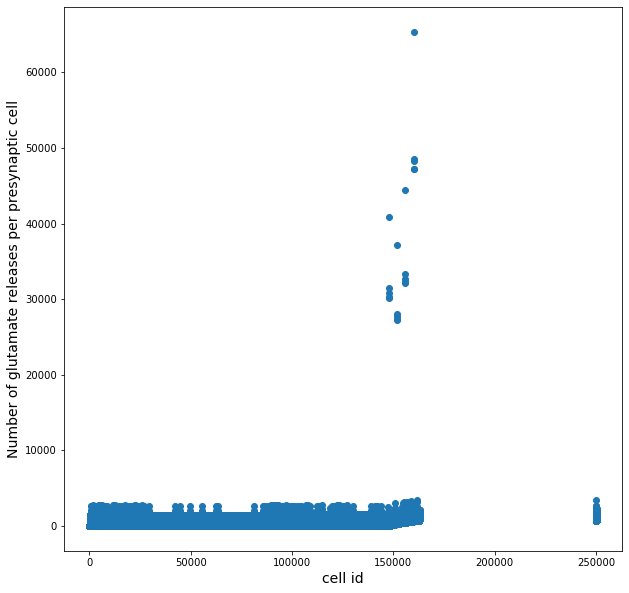

In [37]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_withMet[1],outs_r_glut_withMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


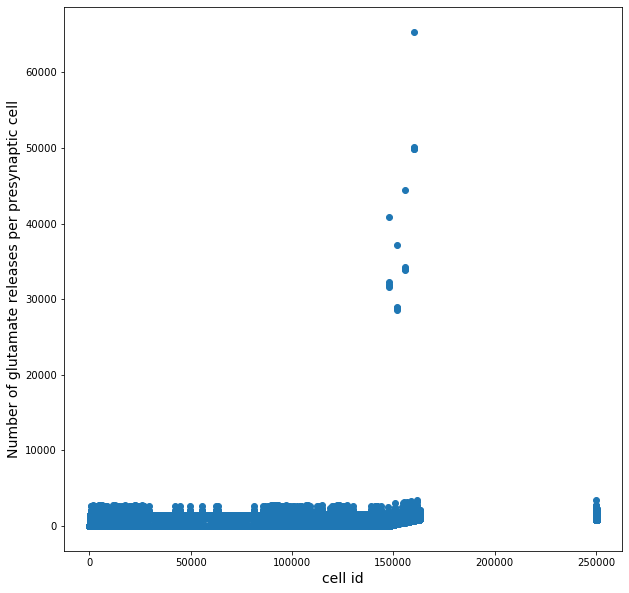

In [38]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_noMet[1],outs_r_glut_noMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


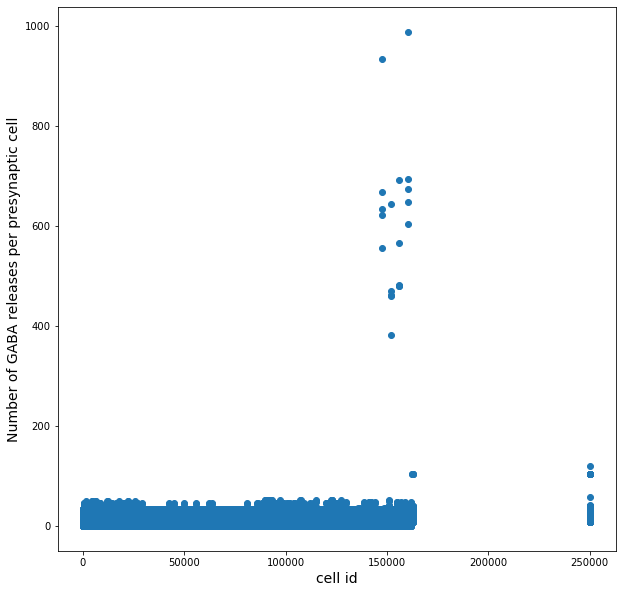

In [39]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_withMet[1],outs_r_gaba_withMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


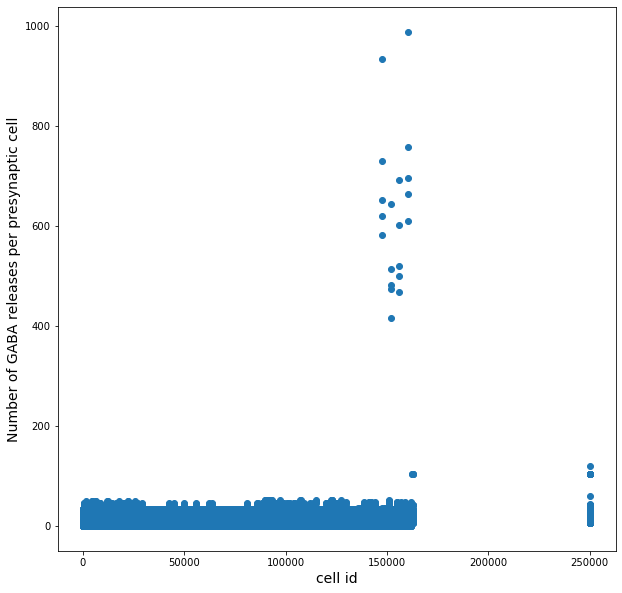

In [40]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_noMet[1],outs_r_gaba_noMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


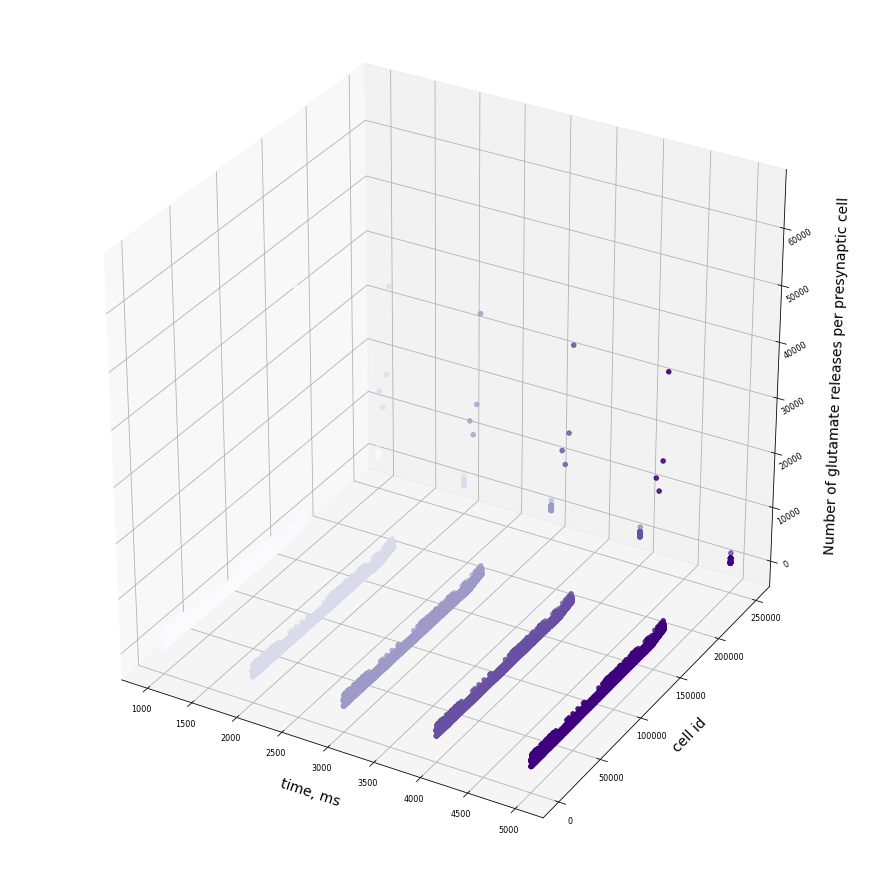

In [41]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_glut_withMet['time, ms']
ys = outs_r_glut_withMet[1]
zs = outs_r_glut_withMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


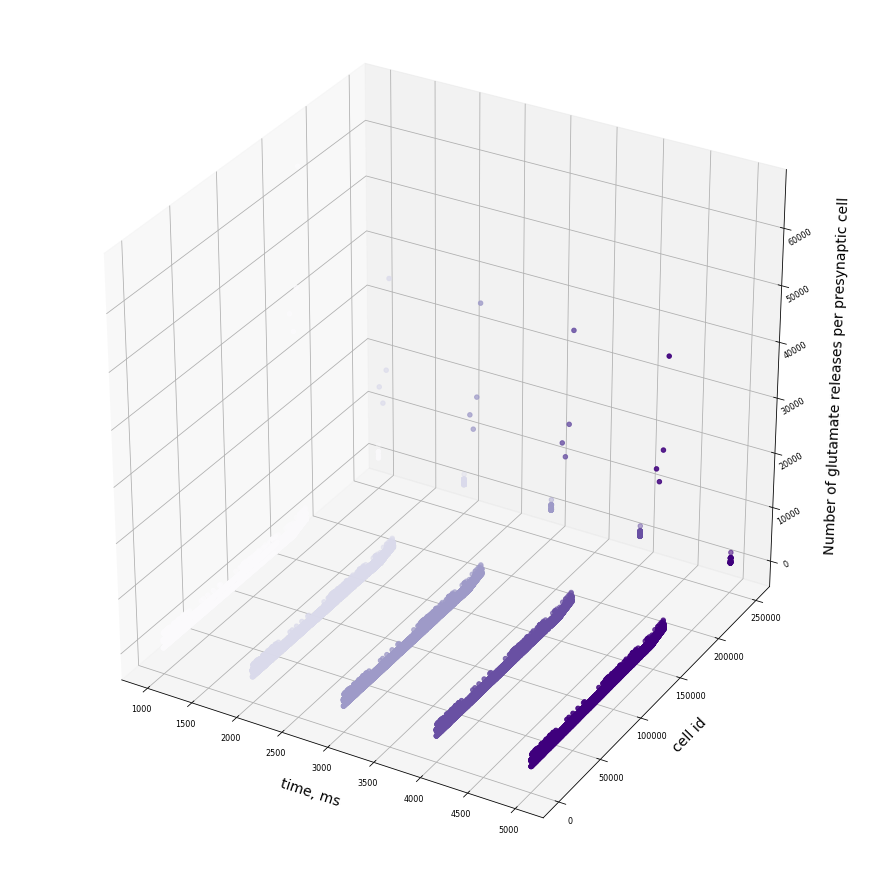

In [42]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_glut_noMet['time, ms']
ys = outs_r_glut_noMet[1]
zs = outs_r_glut_noMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


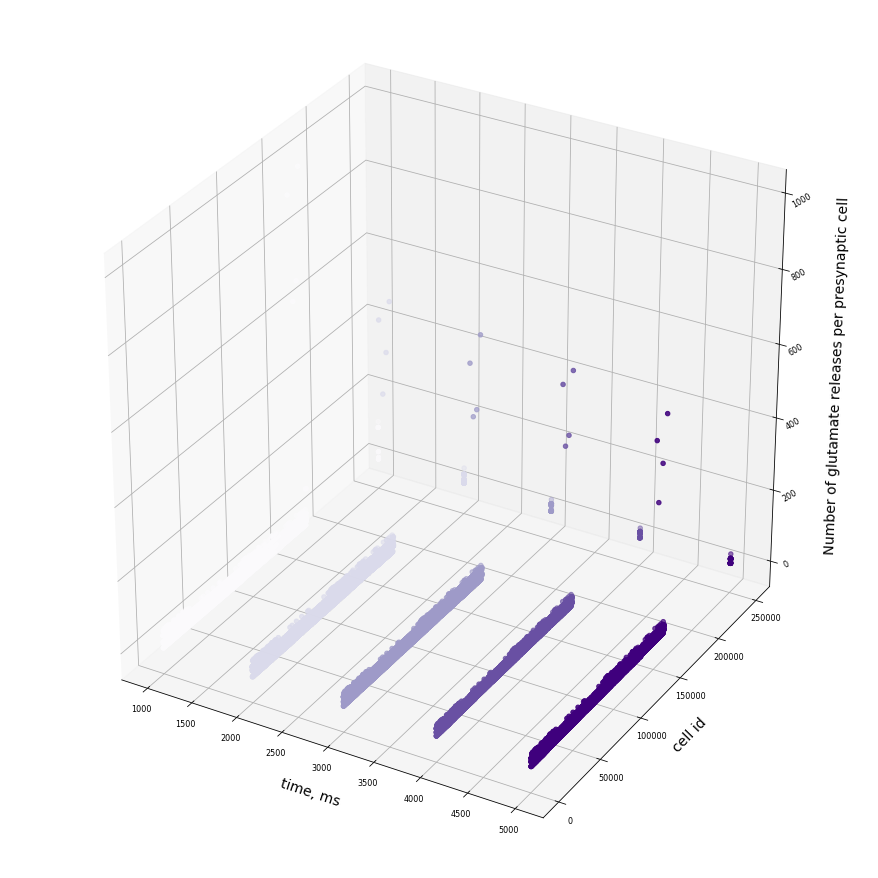

In [43]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_gaba_withMet['time, ms']
ys = outs_r_gaba_withMet[1]
zs = outs_r_gaba_withMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


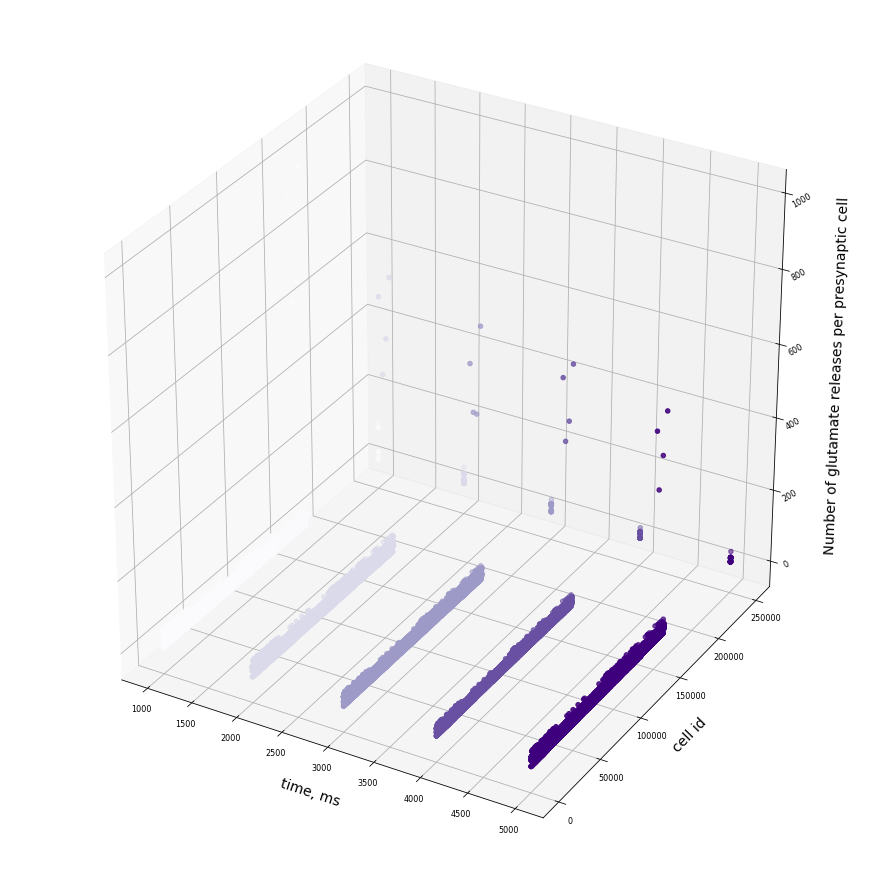

In [44]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_gaba_noMet['time, ms']
ys = outs_r_gaba_noMet[1]
zs = outs_r_gaba_noMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


In [ ]:
#old

### L1

In [5]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/test_cells_mc2_L1/BlueConfig')
report = sim.report('soma')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_L1_02june2020/out_vmv.txt')

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [8]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_L1_02june2020/out_vmv.txt')
vmv.head()

time          2         3          6         11         21         31  \
0   0.0 -65.000000 -65.00000 -65.000000 -65.000000 -65.000000 -65.000000   
1   0.1 -65.157120 -65.18924 -65.083435 -65.206215 -65.168420 -65.136215   
2   0.2 -65.204994 -65.24127 -65.116710 -65.280396 -65.213370 -65.160164   
3   0.3 -65.204090 -65.23641 -65.128260 -65.295620 -65.220665 -65.129490   
4   0.4 -65.166360 -65.19135 -65.122444 -65.263060 -65.203190 -65.056520   

          39        48         49  ...      28366      28371      28376  \
0 -65.000000 -65.00000 -65.000000  ... -65.000000 -65.000000 -65.000000   
1 -65.125670 -65.15842 -65.137930  ... -65.081460 -65.117516 -65.101364   
2 -65.164200 -65.19833 -65.161380  ... -65.107445 -65.167100 -65.127350   
3 -65.165855 -65.19505 -65.129020  ... -65.101340 -65.192620 -65.112490   
4 -65.142944 -65.16003 -65.053314  ... -65.066130 -65.200790 -65.063080   

       28379     28383      28384      28386     28407     28412      28421  
0 -65.000000 -65.00000 -65.000000 -65.000000 -65.00000 -65.00000 -65.000000  
1 -65.110535 -65.23725 -65.292534 -65.225330 -65.19260 -65.10667 -65.204330  
2 -65.138260 -65.32961 -65.420715 -65.321556 -65.29357 -65.14976 -65.305504  
3 -65.128100 -65.36445 -65.464920 -65.373190 -65.35757 -65.16294 -65.359120  
4 -65.086655 -65.35344 -65.445800 -65.392530 -65.39393 -65.15433 -65.375626  

[5 rows x 215 columns]

In [13]:
len(vmv.columns)

215

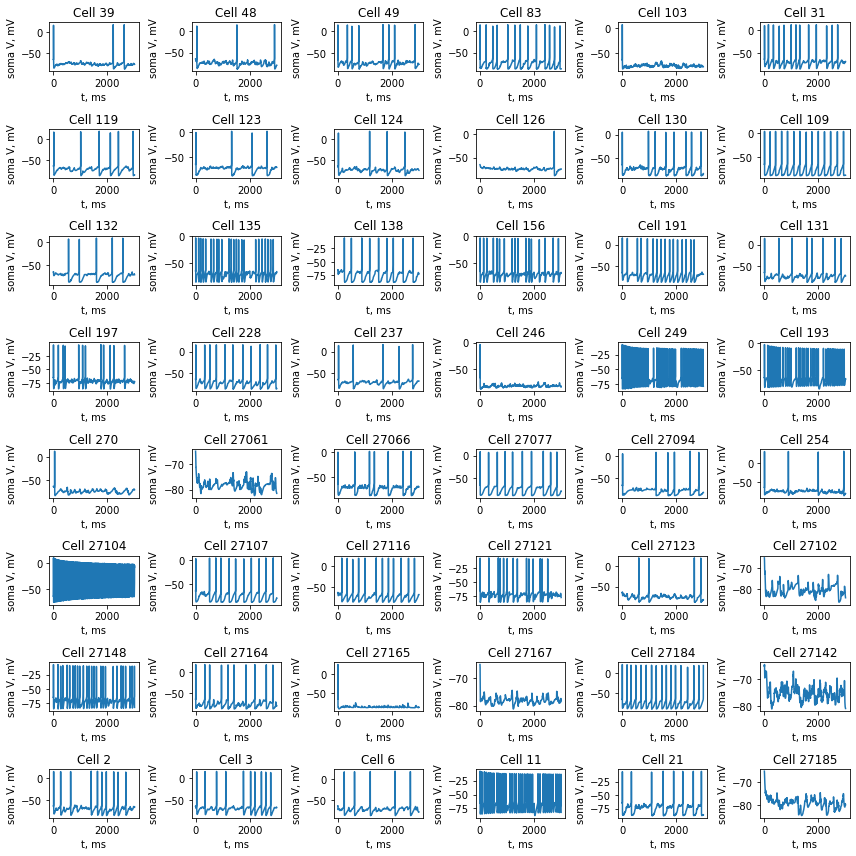

In [18]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.columns[0:49]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/test_cells_mc2_L1/plot_vmv_L1.pdf')


### mc2 nometab

In [5]:
#sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/BlueConfig')

report = sim.report('soma')
data = report.get()

#data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_nometab_14june2020/out_vmv.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [6]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_nometab_14june2020/out_vmv.txt')
vmv.head()


time          2         3          6         11         21         31  \
0   0.0 -65.000000 -65.00000 -65.000000 -65.000000 -65.000000 -65.000000   
1   0.1 -65.157120 -65.18924 -65.083435 -65.206215 -65.168420 -65.136215   
2   0.2 -65.204994 -65.24127 -65.116710 -65.280396 -65.213370 -65.160164   
3   0.3 -65.204090 -65.23641 -65.128260 -65.295620 -65.220665 -65.129490   
4   0.4 -65.166360 -65.19135 -65.122444 -65.263060 -65.203190 -65.056520   

          39        48         49  ...     163211    163221     163231  \
0 -65.000000 -65.00000 -65.000000  ... -65.000000 -65.00000 -65.000000   
1 -65.125670 -65.15842 -65.137930  ... -65.207016 -65.44655 -65.392580   
2 -65.164200 -65.19833 -65.161380  ... -65.272770 -65.32105 -65.523990   
3 -65.165855 -65.19505 -65.129020  ... -65.283160 -64.92055 -65.554726   
4 -65.142944 -65.16003 -65.053314  ... -65.257920 -64.32400 -65.522220   

     163241     163250    163254    163255     163257    163260     163263  
0 -65.00000 -65.000000 -65.00000 -65.00000 -65.000000 -65.00000 -65.000000  
1 -65.30580 -65.217430 -65.39965 -65.13826 -65.172615 -65.11491 -65.128235  
2 -65.44089 -65.286970 -65.53355 -65.09049 -65.250880 -65.15506 -65.180725  
3 -65.49640 -65.297775 -65.56550 -64.95186 -65.281610 -65.15517 -65.194490  
4 -65.49726 -65.270966 -65.53265 -64.74878 -65.278600 -65.12590 -65.180530  

[5 rows x 22919 columns]

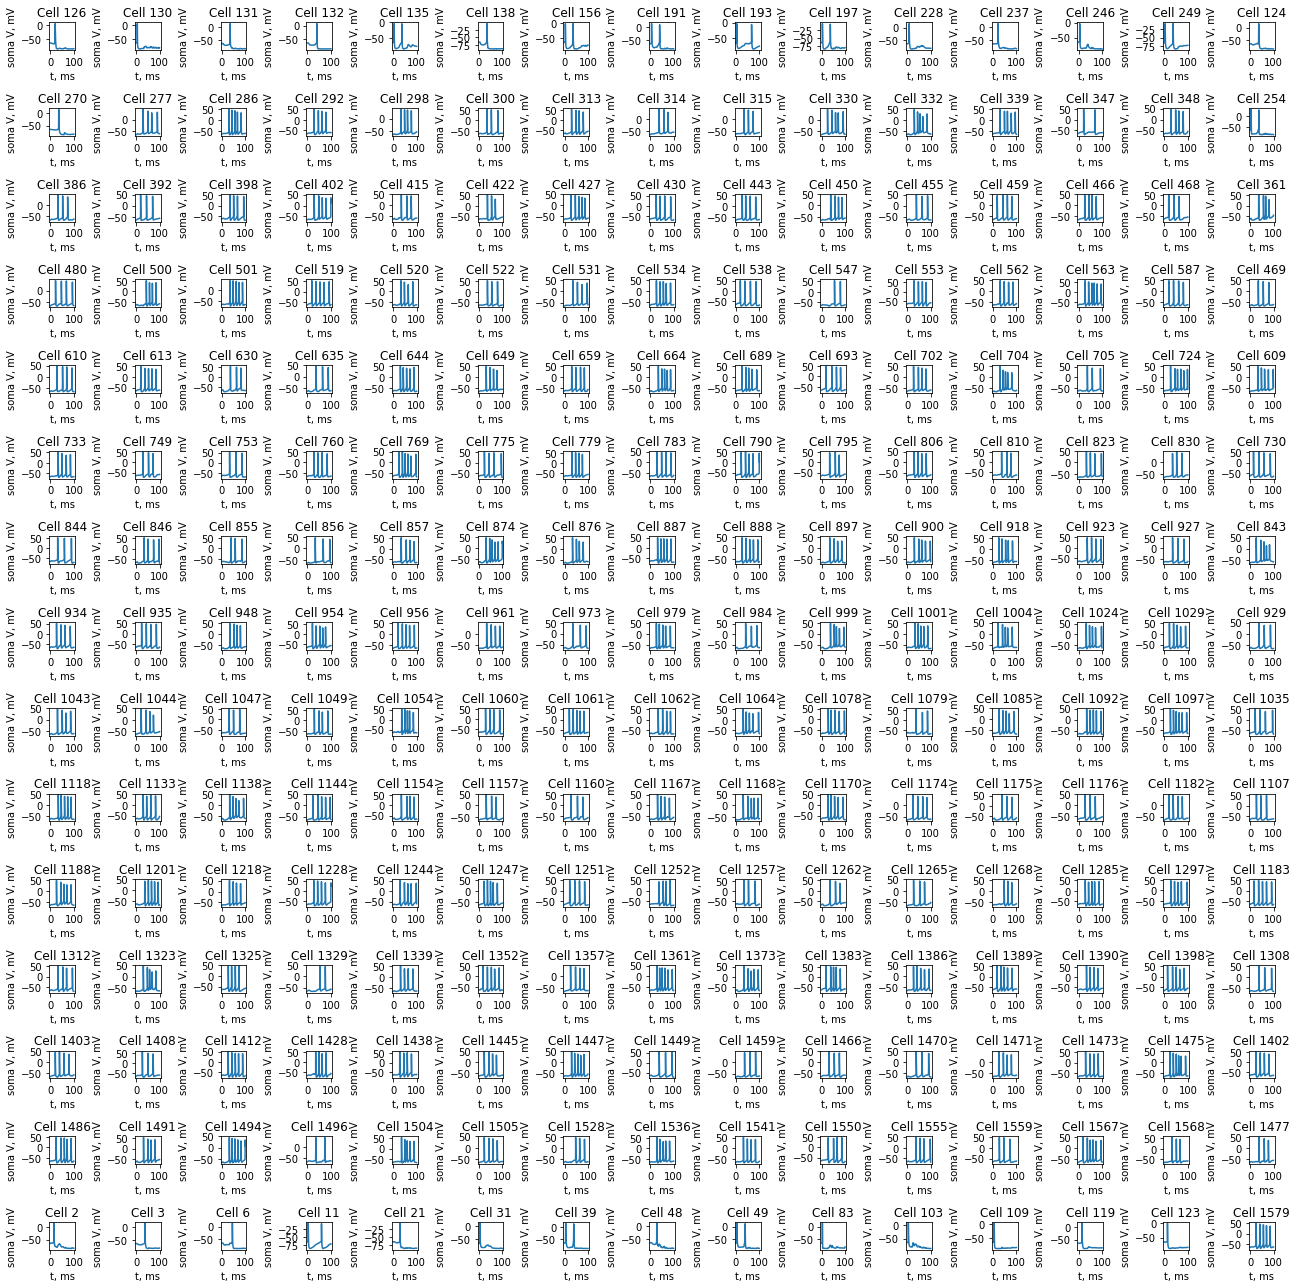

In [15]:
fig, axs = plt.subplots(15,15,figsize=(18,18))

for i,c in enumerate(vmv.columns[0:226]):
    if i == 0:
        continue
    x = i % 15 -1
    y = i // 15 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_64.pdf')

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_100.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_225.pdf')


### met mc2 5kms

In [10]:
!squeue -u shichkov

JOBID     USER     ACCOUNT           NAME       PARTITION ST     REASON     START_TIME       END_TIME      TIME_LEFT NODES               NODELIST(REASON)
858094    shichkov proj34              sh            prod  R       None       06:58:54       18:58:54        4:53:34     2                     r1i7n[1,8]
858082    shichkov proj34              sh            prod  R       None       06:33:17       18:33:17        4:27:57    12                    r1i4n[0-11]
858388    shichkov proj34              sh            prod  R       None       13:34:26       17:34:26        3:29:06    12 r1i5n[3-4,28],r1i6n[6-8,25-27],r1i7n21,r2i1n[24-25]


In [11]:
!ls /gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met

BlueConfig				 nrn_jl_syn_met_16june_atprate_v2.py
julia_code_atpmod_CaGly.jl		 nrn_jl_syn_met_16june.py
julia_code_atpmod.jl			 pydamus_2020-06-16_12h41.log
julia_code.jl				 pydamus_2020-06-16_12h53.log
ngv-stderr858308.log			 pydamus_2020-06-16_13h11.log
nrn_jl_syn_12june_nometab_calcium_cp.py  pydamus_2020-06-16_13h53.log
nrn_jl_syn_12june_nometab_calcium.py	 run_syn_newenv_2.sh
nrn_jl_syn_14june_atpmod.py		 run_syn_newenv_3.sh
nrn_jl_syn_9june_atpmod.py		 slurm-858308.out
nrn_jl_syn_9june_v1.py			 user.target


In [13]:
!mkdir /gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020

In [14]:
#modif now, use BlueConfig_bkp
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met/BlueConfig')

report = sim.report('soma')
data = report.get()

data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [15]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv.txt')
vmv.head()


time          2
0   0.0 -65.000000
1   0.1 -65.157120
2   0.2 -65.204994
3   0.3 -65.204090
4   0.4 -65.166360

In [18]:
vmv.columns

Index(['time', '2'], dtype='object')

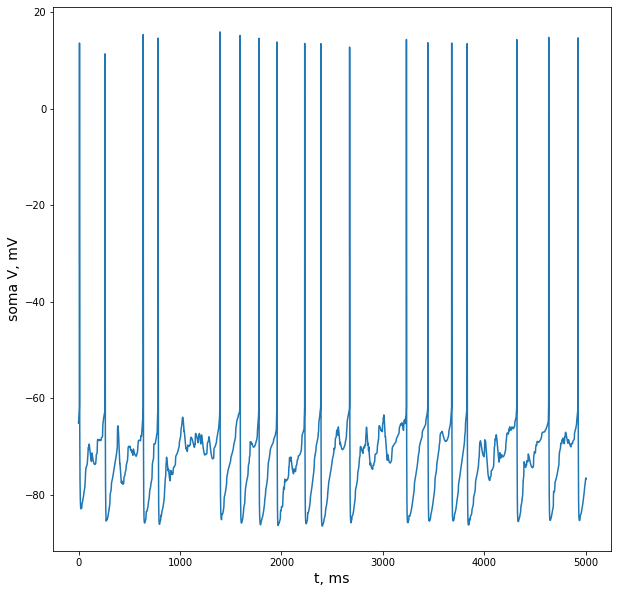

In [24]:
fig = plt.figure(figsize=(10,10))

plt.plot(vmv['time'],vmv['2'])
plt.xlabel('t, ms',fontsize=14)
plt.ylabel('soma V, mV',fontsize=14)

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/plot_vmv_mc2_metab_a2.pdf')


In [25]:
#modif now, use BlueConfig_bkp
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met/BlueConfig')

report = sim.report('soma')
data = report.get()

data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv_pyr.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [26]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv_pyr.txt')
vmv.head()


time     127631
0   0.0 -65.000000
1   0.1 -65.083855
2   0.2 -65.061226
3   0.3 -64.974650
4   0.4 -64.837000

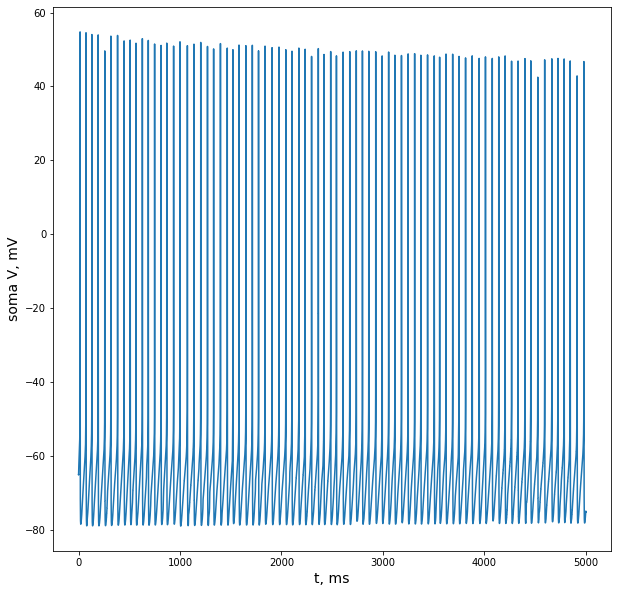

In [29]:
fig = plt.figure(figsize=(10,10))

plt.plot(vmv['time'],vmv['127631'])
plt.xlabel('t, ms',fontsize=14)
plt.ylabel('soma V, mV',fontsize=14)

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/plot_vmv_mc2_metab_a127631.pdf')
